####
# <font color='white'>1.DATA DESCRIPTION</font>
####
#### This dataset contains an airline passenger satisfaction survey. What factors are highly correlated to a satisfied (or dissatisfied) passenger? Can you predict passenger satisfaction?
#### 

####
# <font color='white'>2.FEATURES DESCRIPTION</font>
####

1.NUMERICAL FEATURES
##### Age: The actual age of the passengers
##### Flight distance: The flight distance of this journey
##### Departure Delay in Minutes: Minutes delayed when departure
##### Arrival Delay in Minutes: Minutes delayed when Arrival
####
2.CATEGORICAL FEATURES 
##### Gender: Gender of the passengers (Female, Male)
##### Customer Type: The customer type (Loyal customer, disloyal customer)
##### Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)
##### Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
##### Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
##### Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient
##### Ease of Online booking: Satisfaction level of online booking
##### Gate location: Satisfaction level of Gate location
##### Food and drink: Satisfaction level of Food and drink
##### Online boarding: Satisfaction level of online boarding
##### Seat comfort: Satisfaction level of Seat comfort
##### Inflight entertainment: Satisfaction level of inflight entertainment
##### On-board service: Satisfaction level of On-board service
##### Leg room service: Satisfaction level of Leg room service
##### Baggage handling: Satisfaction level of baggage handling
##### Check-in service: Satisfaction level of Check-in service
##### Inflight service: Satisfaction level of inflight service
##### Cleanliness: Satisfaction level of Cleanliness

#### 
3.OUTCOME/LABEL
##### Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

####
# <font color='white'>3.IMPORTING LIBRARIES</font>
####

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)

####
# <font color='white'>4.IMPORTING DATASET</font>
####

In [2]:
dataset=pd.read_csv(r'train.csv')

####
# <font color='white'>4.DATA UNDERSTANDING</font>
####

In [3]:
dataset.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
dataset.shape

(103904, 25)

In [5]:
dataset.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [6]:
dataset.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [8]:
dataset.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [9]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,103904.0,51951.500000,29994.645522,0.0,25975.75,51951.5,77927.25,103903.0
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0


In [10]:
dataset.describe(include='O')

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


In [11]:
dataset.duplicated().sum()

0

In [12]:
dataset.nunique()

Unnamed: 0                           103904
id                                   103904
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3802
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes      

####
# <font color='white'>5.DATA CLEANING</font>
####

#####
### <font color='pink'>5.1.MISSING VALUES</font>
#####

In [13]:
dataset['Arrival Delay in Minutes'].describe()

count    103594.000000
mean         15.178678
std          38.698682
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

In [14]:
dataset['Arrival Delay in Minutes']=dataset['Arrival Delay in Minutes'].fillna(dataset['Arrival Delay in Minutes'].median())

In [15]:
dataset.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

#####
### <font color='pink'>5.2.REMOVING UNNECESSARY COLUMNS</font>
#####

In [16]:
dataset.drop(['Unnamed: 0','id'],inplace=True,axis=1)

####
# <font color='white'>6.EXPLORATORY DATA  ANALYSIS(EDA)</font>
####

#####
### <font color='orange'>6.1.UNIVARIATE ANALYSIS</font>
#####

#####
### <font color='pink'>6.1.1.AGE</font>
#####

In [17]:
dataset.Age.describe()

count    103904.000000
mean         39.379706
std          15.114964
min           7.000000
25%          27.000000
50%          40.000000
75%          51.000000
max          85.000000
Name: Age, dtype: float64

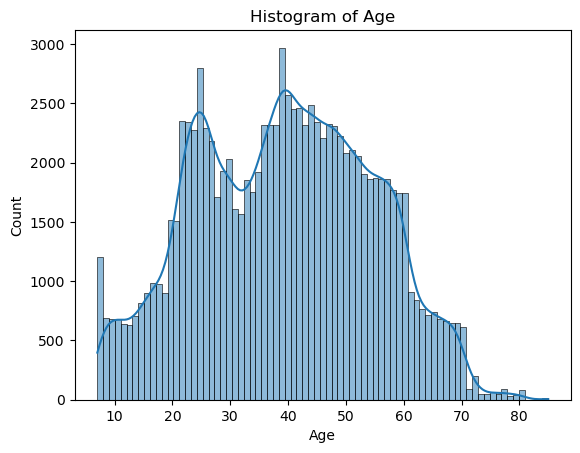

In [18]:
sns.histplot(data=dataset,x='Age',kde=True)
plt.title("Histogram of Age")
plt.show()

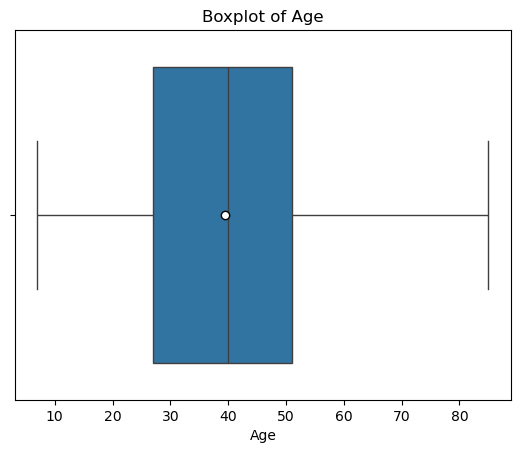

In [19]:
sns.boxplot(data=dataset,x='Age',showmeans=True,meanprops={'marker':'o','markeredgecolor':'black','markerfacecolor':'white'})
plt.title('Boxplot of Age')
plt.show()

#### The minimum age of the passenger is 7 years old while there are some passengers are of age 85.
#### The average age of the passenger is 39 years old while 50% of the passengers are below 40 years old.
#### The distribution of age is close to normal distribution.
#### From boxplot it is clear that there aren't any outliers in the data.

#####
### <font color='pink'>6.1.2.FLIGHT DISTANCE</font>
#####

In [20]:
dataset['Flight Distance'].describe()

count    103904.000000
mean       1189.448375
std         997.147281
min          31.000000
25%         414.000000
50%         843.000000
75%        1743.000000
max        4983.000000
Name: Flight Distance, dtype: float64

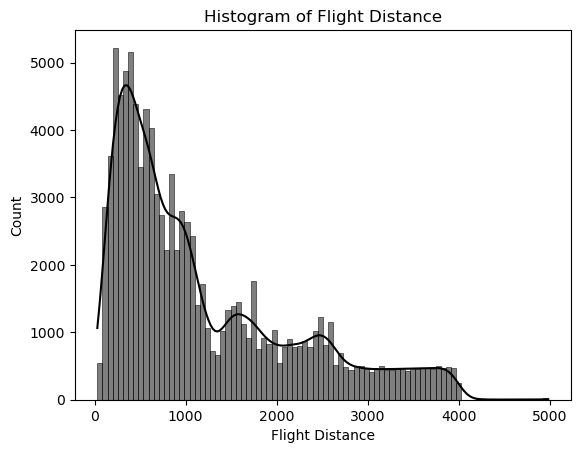

In [21]:

sns.histplot(data=dataset,x='Flight Distance',color='black',kde=True)
plt.title("Histogram of Flight Distance")
plt.show()

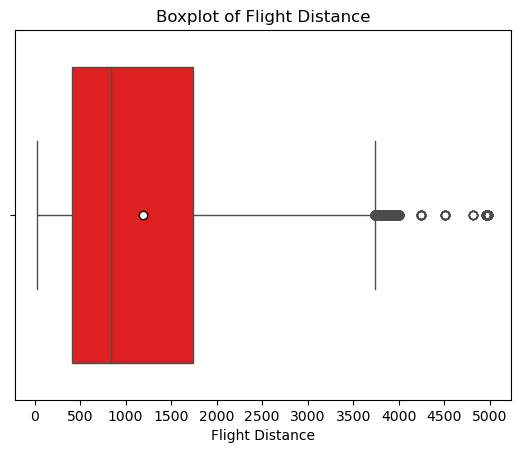

In [22]:
sns.boxplot(data=dataset,x='Flight Distance',color='red',showmeans=True,meanprops={'marker':'o','markeredgecolor':'black','markerfacecolor':'white'})
plt.title('Boxplot of Flight Distance')
plt.xticks(np.arange(0,5500,500))
plt.show()

#### The shortest flight covers  31 nautical miles  whereas the maximum distance covered is 4,983 nautical miles.
#### The histogram is right skewed however 50% of distances covered are below 843 nautical miles.
#### The boxplot shows that distances above 3700 nautical miles are considered as outliers

#####
### <font color='pink'>6.1.3.INFLIGHT WIFI SERVICE</font>
#####

In [23]:
dataset['Inflight wifi service'].describe()

count    103904.000000
mean          2.729683
std           1.327829
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Inflight wifi service, dtype: float64

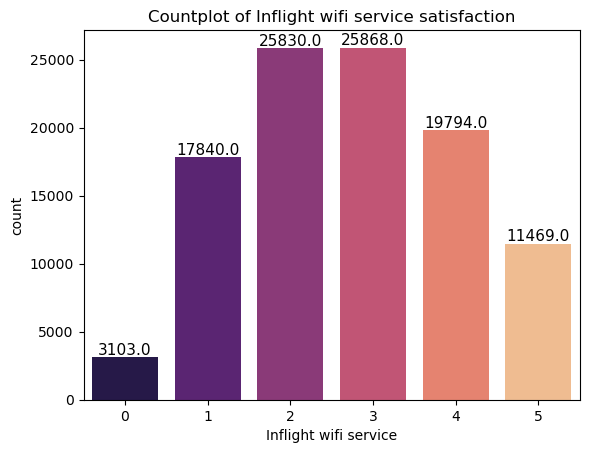

In [24]:
sns.countplot(data=dataset,x='Inflight wifi service',palette='magma')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       fontsize=11, color='black',
                       xytext=(0, 5),
                       textcoords='offset points')
plt.title('Countplot of Inflight wifi service satisfaction')
plt.show()

#### 3,103 passengers were not applicable (person responding to the survey or providing feedback did not use the inflight wifi service or did not have the opportunity to use it.)
#### 17,840 passengers were poorly satisfied whereas 25,830 passengers showed moderate satisfaction.
#### Most of the passengers have given satisfaction level of 3 out of 5 which is average satisfaction.
#### 19,749 passengers were highly satisfied by inflight wifi service while, 11,469 passengers really enjoyed inflight wifi services and showed excellent satisfaction

#####
### <font color='pink'>6.1.4.DEPARTURE/ARRIVAL TIME CONVENIENT</font>
#####

In [25]:
dataset['Departure/Arrival time convenient'].describe()

count    103904.000000
mean          3.060296
std           1.525075
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Departure/Arrival time convenient, dtype: float64

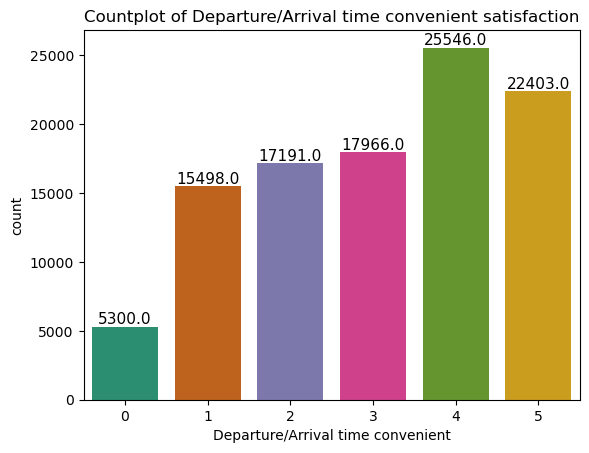

In [26]:
sns.countplot(data=dataset,x='Departure/Arrival time convenient',palette='Dark2')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       fontsize=11, color='black',
                       xytext=(0, 5),
                       textcoords='offset points')
plt.title('Countplot of Departure/Arrival time convenient satisfaction')
plt.show()

#### 5300 passengers were not applicable (person responding to the survey or providing feedback did not have any opinions)
#### 15,498 passengers were poorly satisfied whereas 17191 passengers showed moderate satisfaction.
#### 17,966 passengers showed average satisfaction .
#### Most of the passengers have given satisfaction level of 4 out of 5 which is high satisfaction.
#### 22,403 passengers showed excellent satisfaction.

#####
### <font color='pink'>6.1.5.EASE OF ONLINE BOOKING</font>
#####

In [27]:
dataset['Ease of Online booking'].describe()

count    103904.000000
mean          2.756901
std           1.398929
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Ease of Online booking, dtype: float64

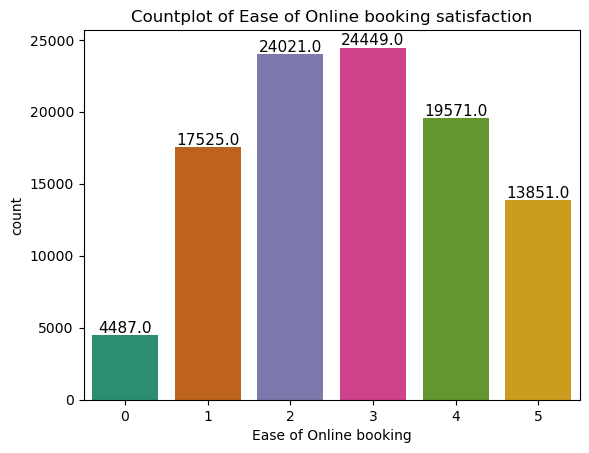

In [28]:
sns.countplot(data=dataset,x='Ease of Online booking',palette='Dark2')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       fontsize=11, color='black',
                       xytext=(0, 5),
                       textcoords='offset points')
plt.title('Countplot of Ease of Online booking satisfaction')
plt.show()

#### 4487 passengers were not applicable (person responding to the survey or providing feedback did not have any opinions)
#### 17,525 passengers were poorly satisfied whereas 24,021 passengers showed moderate satisfaction.
#### Most of the passengers have given satisfaction level of 3 out of 5 which is average satisfaction.
#### 19,571 passengers gave high satisfaction.
#### 13,851 passengers showed excellent satisfaction.

#####
### <font color='pink'>6.1.6.GATE LOCATION</font>
#####

In [29]:
dataset['Gate location'].describe()                    

count    103904.000000
mean          2.976883
std           1.277621
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Gate location, dtype: float64

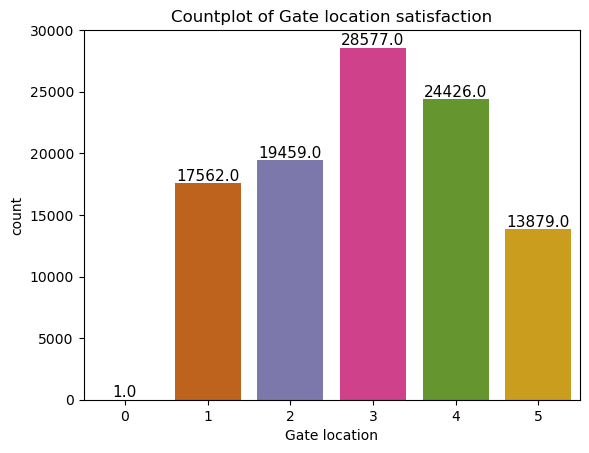

In [30]:
sns.countplot(data=dataset,x='Gate location',palette='Dark2')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       fontsize=11, color='black',
                       xytext=(0, 5),
                       textcoords='offset points')
plt.title('Countplot of Gate location satisfaction')
plt.show()

#### 1 passenger was not applicable (person responding to the survey or providing feedback did not have any opinions)
#### 17,562 passengers were poorly satisfied whereas 19,459 passengers showed moderate satisfaction.
#### Most of the passengers(28,577) have given satisfaction level of 3 out of 5 which is moderate satisfaction.
#### 24,426 passengers gave high satisfaction.
#### 13,879 passengers showed excellent satisfaction.

#####
### <font color='pink'>6.1.7.FOOD AND DRINK</font>
#####

In [31]:
 dataset['Food and drink'].describe()

count    103904.000000
mean          3.202129
std           1.329533
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Food and drink, dtype: float64

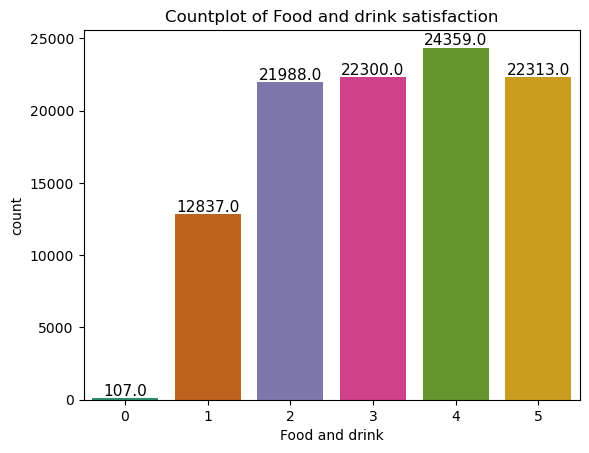

In [32]:
sns.countplot(data=dataset,x='Food and drink',palette='Dark2')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       fontsize=11, color='black',
                       xytext=(0, 5),
                       textcoords='offset points')
plt.title('Countplot of Food and drink satisfaction')
plt.show()

#### 107 passenger was not applicable (person responding to the survey or providing feedback did not have any opinions)
#### 12,837 passengers were poorly satisfied whereas 21,988 passengers showed moderate satisfaction.
#### 22,300 passengers gave average satisfaction.
#### Most of the passengers(23,359) have given satisfaction level of 4 out of 5 which is high satisfaction.
#### 22,313 passengers showed excellent satisfaction.

#####
### <font color='pink'>6.1.8.ONLINE BOARDING</font>
#####

In [33]:
dataset['Online boarding'].describe()

count    103904.000000
mean          3.250375
std           1.349509
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Online boarding, dtype: float64

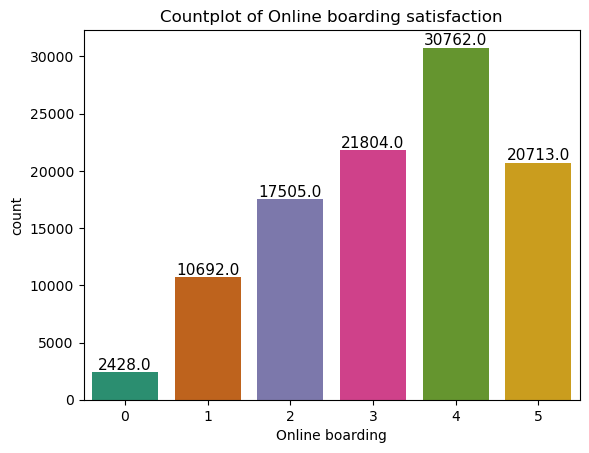

In [34]:
sns.countplot(data=dataset,x='Online boarding',palette='Dark2')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       fontsize=11, color='black',
                       xytext=(0, 5),
                       textcoords='offset points')
plt.title('Countplot of Online boarding satisfaction')
plt.show()

#### 2428 passenger was not applicable (person responding to the survey or providing feedback did not have any opinions)
#### 10,692 passengers were poorly satisfied whereas 17,505 passengers showed moderate satisfaction.
#### 21,804 passengers gave average satisfaction.
#### Most of the passengers(30,762) have given satisfaction level of 4 out of 5 which is high satisfaction.
#### 20,713 passengers showed excellent satisfaction.

#####
### <font color='pink'>6.1.9.SEAT COMFORT</font>
#####

In [35]:
dataset['Seat comfort'].describe()

count    103904.000000
mean          3.439396
std           1.319088
min           0.000000
25%           2.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: Seat comfort, dtype: float64

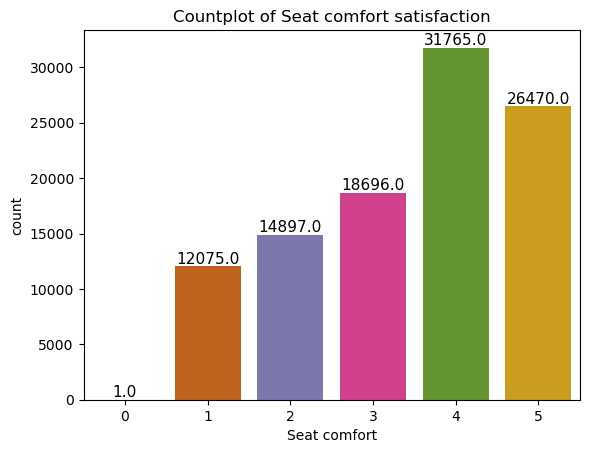

In [36]:
sns.countplot(data=dataset,x='Seat comfort',palette='Dark2')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       fontsize=11, color='black',
                       xytext=(0, 5),
                       textcoords='offset points')
plt.title('Countplot of Seat comfort satisfaction')
plt.show()

#### 1 passenger was not applicable (person responding to the survey or providing feedback did not have any opinions)
#### 12,075  passengers were poorly satisfied whereas 14,897 passengers showed moderate satisfaction.
#### 18,696 passengers gave average satisfaction.
#### Most of the passengers(31,765) have given satisfaction level of 4 out of 5 which is high satisfaction.
#### 26,470 passengers showed excellent satisfaction.

#####
### <font color='pink'>6.1.10.INFLIGHT ENTERTAINMENT</font>
#####

In [37]:
dataset['Inflight entertainment'].describe()

count    103904.000000
mean          3.358158
std           1.332991
min           0.000000
25%           2.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: Inflight entertainment, dtype: float64

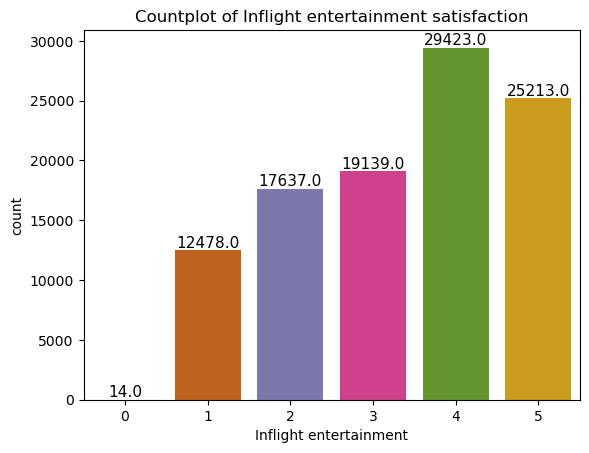

In [38]:
sns.countplot(data=dataset,x='Inflight entertainment',palette='Dark2')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       fontsize=11, color='black',
                       xytext=(0, 5),
                       textcoords='offset points')
plt.title('Countplot of Inflight entertainment satisfaction')
plt.show()

#### 14 passenger were not applicable (person responding to the survey or providing feedback did not have any opinions)
#### 12,478  passengers were poorly satisfied whereas 17,637 passengers showed moderate satisfaction.
#### 19,139 passengers gave average satisfaction.
#### Most of the passengers(29,423) have given satisfaction level of 4 out of 5 which is high satisfaction.
#### 25,213 passengers showed excellent satisfaction.

#####
### <font color='pink'>6.1.11.ON-BOARD SERVICE</font>
#####

In [39]:
dataset['On-board service'].describe()

count    103904.000000
mean          3.382363
std           1.288354
min           0.000000
25%           2.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: On-board service, dtype: float64

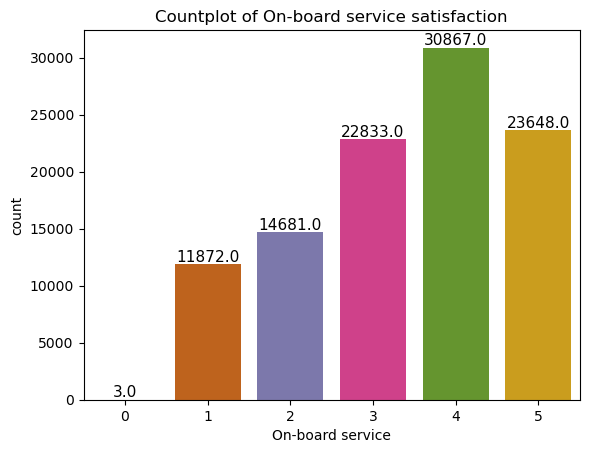

In [40]:
sns.countplot(data=dataset,x='On-board service',palette='Dark2')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       fontsize=11, color='black',
                       xytext=(0, 5),
                       textcoords='offset points')
plt.title('Countplot of On-board service satisfaction')
plt.show()

#### 3 passenger were not applicable (person responding to the survey or providing feedback did not have any opinions)
#### 11,872  passengers were poorly satisfied whereas 14,681 passengers showed moderate satisfaction.
#### 22,833 passengers gave average satisfaction.
#### Most of the passengers(30,867) have given satisfaction level of 4 out of 5 which is high satisfaction.
#### 23,648 passengers showed excellent satisfaction.

#####
### <font color='pink'>6.1.12.LEG ROOM SERVICE</font>
#####

In [41]:
dataset['Leg room service'].describe()

count    103904.000000
mean          3.351055
std           1.315605
min           0.000000
25%           2.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: Leg room service, dtype: float64

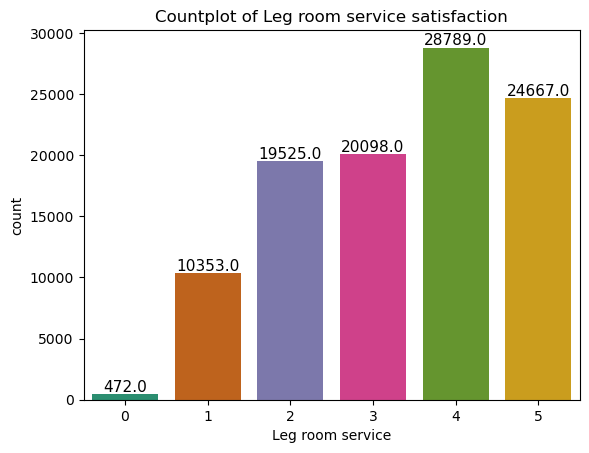

In [42]:
sns.countplot(data=dataset,x='Leg room service',palette='Dark2')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       fontsize=11, color='black',
                       xytext=(0, 5),
                       textcoords='offset points')
plt.title('Countplot of Leg room service satisfaction')
plt.show()

#### 472  passenger were not applicable (person responding to the survey or providing feedback did not have any opinions)
#### 10,353  passengers were poorly satisfied whereas 19,525 passengers showed moderate satisfaction.
#### 20,098 passengers gave average satisfaction.
#### Most of the passengers(28,789) have given satisfaction level of 4 out of 5 which is high satisfaction.
#### 24,667 passengers showed excellent satisfaction.

#####
### <font color='pink'>6.1.13.BAGGAGE HANDLING</font>
#####

In [43]:
dataset['Baggage handling'].describe()

count    103904.000000
mean          3.631833
std           1.180903
min           1.000000
25%           3.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: Baggage handling, dtype: float64

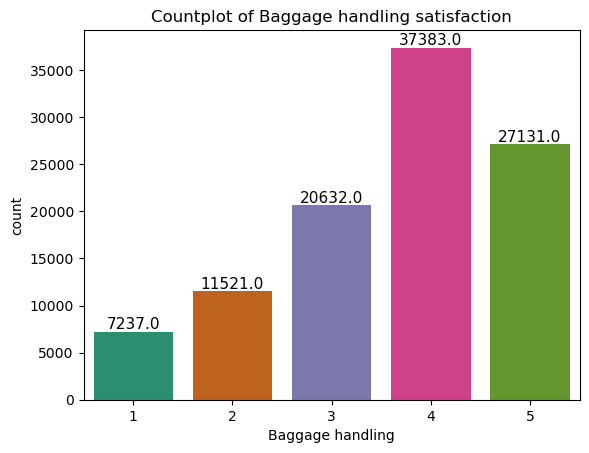

In [44]:
sns.countplot(data=dataset,x='Baggage handling',palette='Dark2')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       fontsize=11, color='black',
                       xytext=(0, 5),
                       textcoords='offset points')
plt.title('Countplot of Baggage handling satisfaction')
plt.show()

#### 7,237 passengers were poorly satisfied whereas 11,521 passengers showed moderate satisfaction.
#### 20,632 passengers gave average satisfaction.
#### Most of the passengers(37,383) have given satisfaction level of 4 out of 5 which is high satisfaction.
#### 27,131 passengers showed excellent satisfaction.

#####
### <font color='pink'>6.1.14.CHECKIN SERVICE</font>
#####

In [45]:
dataset['Checkin service'].describe()

count    103904.000000
mean          3.304290
std           1.265396
min           0.000000
25%           3.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Checkin service, dtype: float64

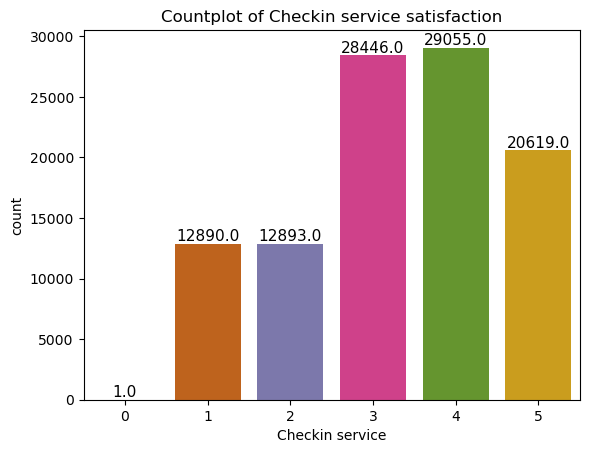

In [46]:
sns.countplot(data=dataset,x='Checkin service',palette='Dark2')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       fontsize=11, color='black',
                       xytext=(0, 5),
                       textcoords='offset points')
plt.title('Countplot of Checkin service satisfaction')
plt.show()

#### 1 passenger was not applicable (person responding to the survey or providing feedback did not have any opinions)
#### 12,890  passengers were poorly satisfied whereas 12,893 passengers showed moderate satisfaction.
#### 28,446 passengers gave average satisfaction.
#### Most of the passengers(29,055) have given satisfaction level of 4 out of 5 which is high satisfaction.
#### 20,619 passengers showed excellent satisfaction.

#####
### <font color='pink'>6.1.15.INFLIGHT SERVICE</font>
#####

In [47]:
dataset['Inflight service'].describe()

count    103904.000000
mean          3.640428
std           1.175663
min           0.000000
25%           3.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: Inflight service, dtype: float64

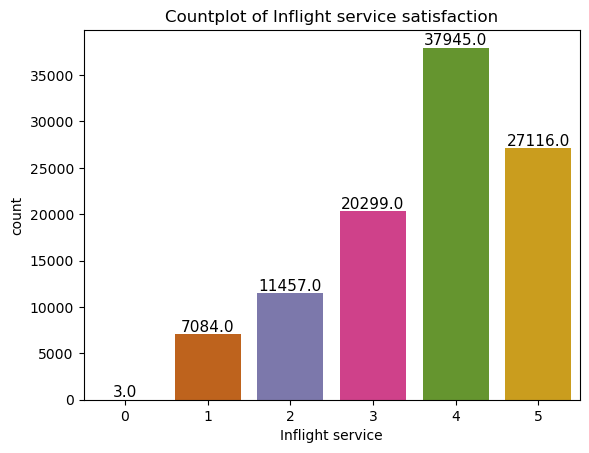

In [48]:
sns.countplot(data=dataset,x='Inflight service',palette='Dark2')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       fontsize=11, color='black',
                       xytext=(0, 5),
                       textcoords='offset points')
plt.title('Countplot of Inflight service satisfaction')
plt.show()

#### 3 passengers were not applicable (person responding to the survey or providing feedback did not have any opinions)
#### 7,084  passengers were poorly satisfied whereas 11,457 passengers showed moderate satisfaction.
#### 20,299 passengers gave average satisfaction.
#### Most of the passengers(37945) have given satisfaction level of 4 out of 5 which is high satisfaction.
#### 27,116 passengers showed excellent satisfaction.

#####
### <font color='pink'>6.1.16.CLEANLINESS</font>
#####

In [49]:
     dataset['Cleanliness'].describe()

count    103904.000000
mean          3.286351
std           1.312273
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Cleanliness, dtype: float64

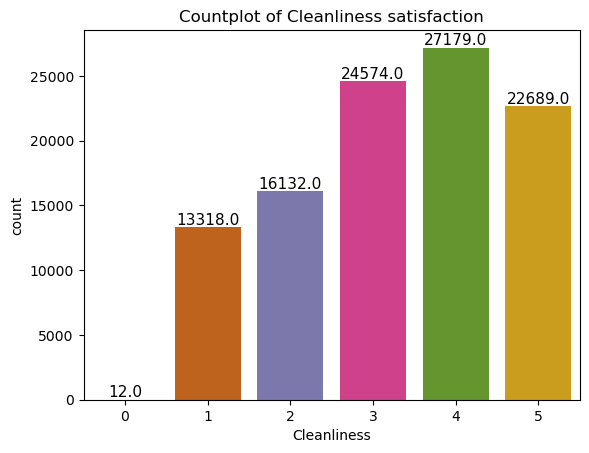

In [50]:
sns.countplot(data=dataset,x='Cleanliness',palette='Dark2')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       fontsize=11, color='black',
                       xytext=(0, 5),
                       textcoords='offset points')
plt.title('Countplot of Cleanliness satisfaction')
plt.show()

#### 12 passengers were not applicable (person responding to the survey or providing feedback did not have any opinions)
#### 13,318  passengers were poorly satisfied whereas 16,132 passengers showed moderate satisfaction.
#### 24,574 passengers gave average satisfaction.
#### Most of the passengers(27179) have given satisfaction level of 4 out of 5 which is high satisfaction.
#### 22,689 passengers showed excellent satisfaction.

#####
### <font color='pink'>6.1.17.DEPARTURE DELAY IN MINUTES</font>
#####

In [51]:
dataset['Departure Delay in Minutes'].describe()

count    103904.000000
mean         14.815618
std          38.230901
min           0.000000
25%           0.000000
50%           0.000000
75%          12.000000
max        1592.000000
Name: Departure Delay in Minutes, dtype: float64

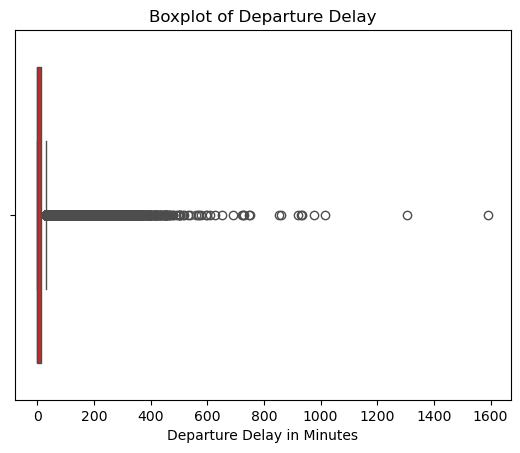

In [52]:
sns.boxplot(data=dataset,x='Departure Delay in Minutes',color='red')
plt.title('Boxplot of Departure Delay')
plt.show()

#### The minimum departure delay seems to be 0 (no delay) whereas sometimes the delay during departure has reached upto 1,592 (26 hours) more than a day.
#### Many delays are considered as outliers in boxplot.
#### 50% are no delays whereas above 50% we have some delays and some of them have very extreme values.

#####
### <font color='pink'>6.1.18.ARRIVAL TIME IN MINUTES</font>
#####

In [53]:
dataset['Arrival Delay in Minutes'].describe()

count    103904.000000
mean         15.133392
std          38.649776
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

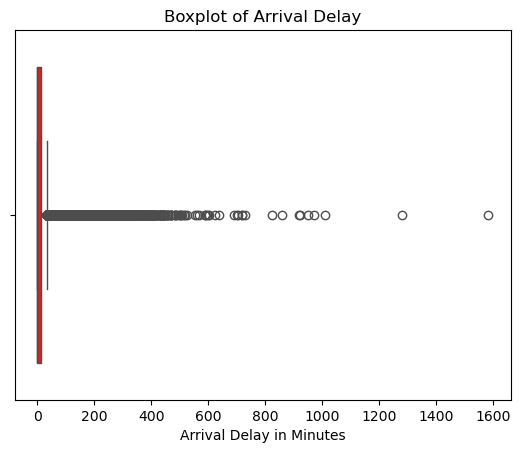

In [54]:
sns.boxplot(data=dataset,x='Arrival Delay in Minutes',color='red')
plt.title('Boxplot of Arrival Delay')
plt.show()

#### 50% of times the flights have arrived on time whereas some of the flight have very high arrival delays nearly 26.4 hours. 

#####
### <font color='pink'>6.1.19.GENDER</font>
#####

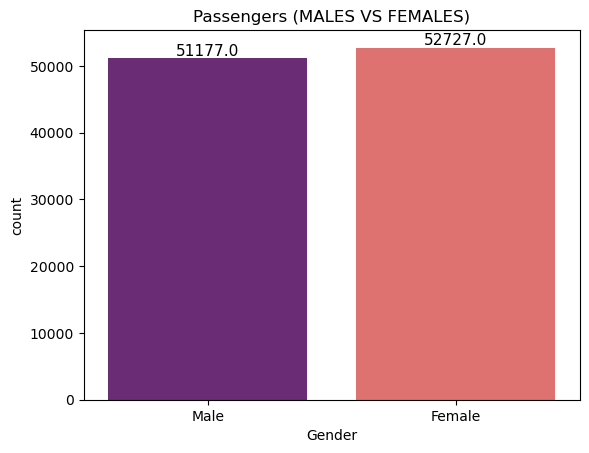

In [55]:
#Gender
sns.countplot(data=dataset,x='Gender',palette='magma')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       fontsize=11, color='black',
                       xytext=(0, 5),
                       textcoords='offset points')
plt.title('Passengers (MALES VS FEMALES)')
plt.show()

#### From above countplot , it is found that there are more numbers of female passengers(52,727) than male passengers(51,177) who travel by air.

#####
### <font color='pink'>6.1.20.CUSTOMER TYPE</font>
#####

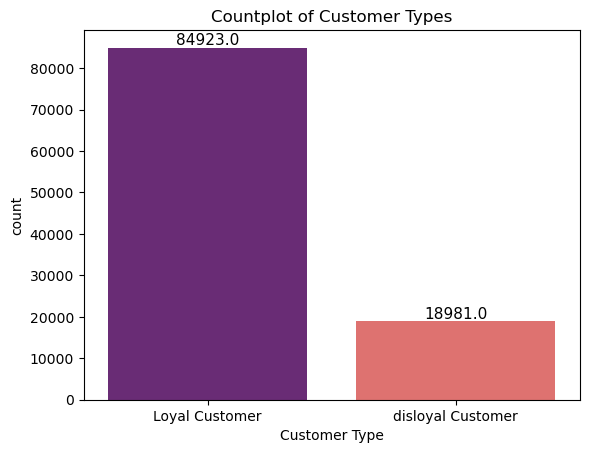

In [56]:
sns.countplot(data=dataset,x='Customer Type',palette='magma')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       fontsize=11, color='black',
                       xytext=(0, 5),
                       textcoords='offset points')
plt.title('Countplot of Customer Types')
plt.show()

#### From above countplot , it is found that 84,923 passengers are Loyal Customers whereas 18,981 are disloyal Customers

#####
### <font color='pink'>6.1.21.TYPE OF TRAVEL</font>
#####

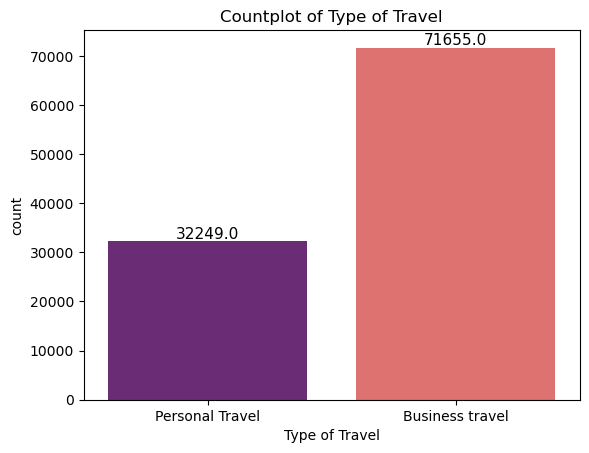

In [57]:
sns.countplot(data=dataset,x='Type of Travel',palette='magma')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       fontsize=11, color='black',
                       xytext=(0, 5),
                       textcoords='offset points')
plt.title('Countplot of Type of Travel')
plt.show()

#### From above countplot it is found that 32,249 passengers travelled for personal reasons whereas 71,655 passengers travelled for Business purpose.

#####
### <font color='pink'>6.1.22.CLASS</font>
#####

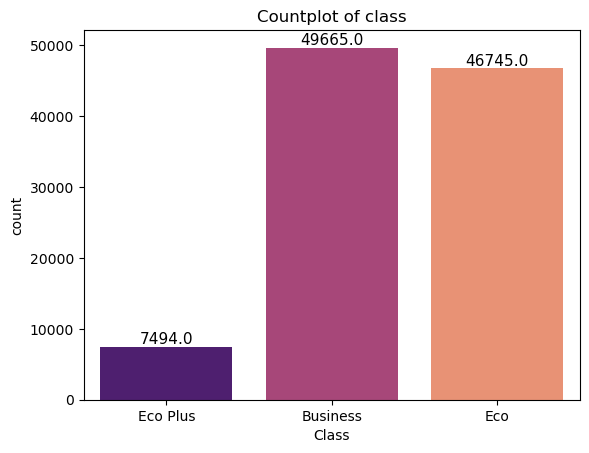

In [58]:
sns.countplot(data=dataset,x='Class',palette='magma')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       fontsize=11, color='black',
                       xytext=(0, 5),
                       textcoords='offset points')
plt.title('Countplot of class')
plt.show()

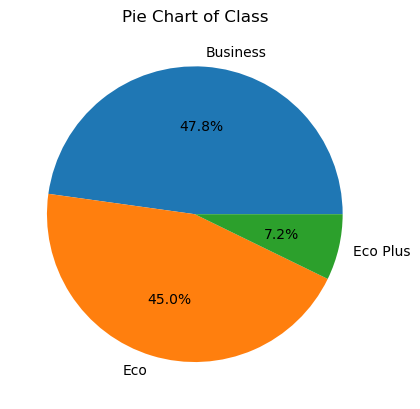

In [59]:
class_counts=dataset['Class'].value_counts()
labels=['Business','Eco','Eco Plus']
plt.pie(class_counts,labels=labels,autopct='%1.1f%%');
plt.title('Pie Chart of Class');

#### From above countplot , it is found that 7,494(7.2%) passengers were of Eco Plus class,49,665 passengers booked business class (77.8%)and 46,745 passengers booked Eco class(45.0%)

#####
### <font color='pink'>6.1.23.SATISFACTION</font>
#####

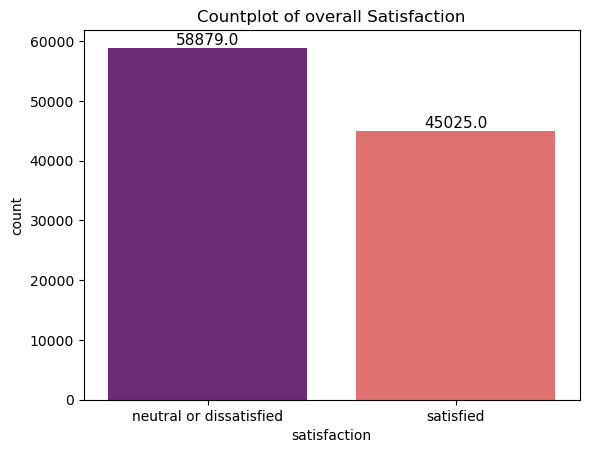

In [60]:
sns.countplot(data=dataset,x='satisfaction',palette='magma')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       fontsize=11, color='black',
                       xytext=(0, 5),
                       textcoords='offset points')
plt.title('Countplot of overall Satisfaction')
plt.show()

#### From above countplot, it is found that about 58,879 passengers were neutral or dissatisfied overally , however 45,025 people were satisfied fully.

#####
### <font color='orange'>6.2.BIVARIATE ANALYSIS</font>
#####

#####
### <font color='pink'>6.2.1.AGE VS SATISFACTION</font>
#####

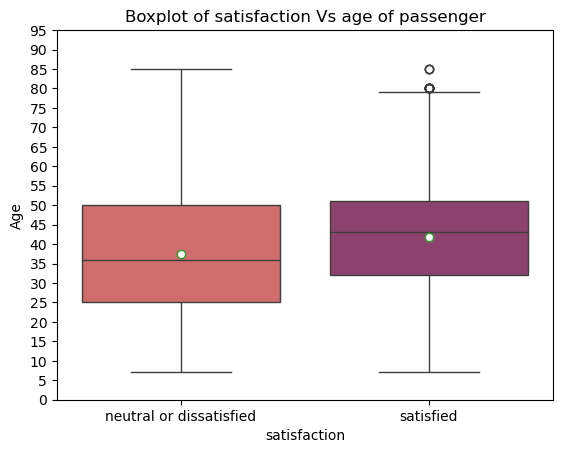

In [61]:
sns.boxplot(data=dataset,x='satisfaction',y='Age',palette='flare',showmeans=True,meanprops={'marker':'o','markerfacecolor':'white'})
plt.title('Boxplot of satisfaction Vs age of passenger')
plt.yticks(np.arange(0,100,5))
plt.show()

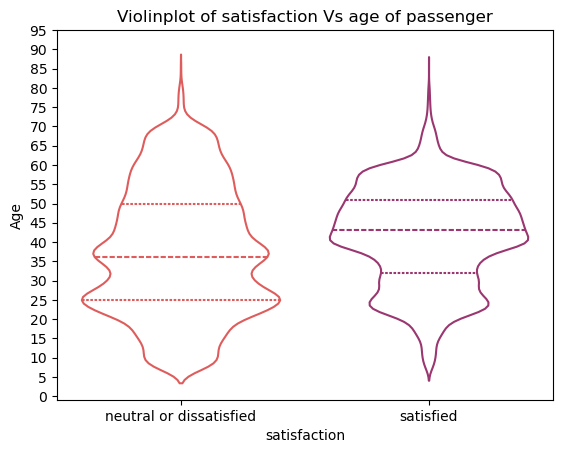

In [62]:
sns.violinplot(data=dataset,x='satisfaction',y='Age',palette='flare',inner='quart',fill=False)
plt.title('Violinplot of satisfaction Vs age of passenger')
plt.yticks(np.arange(0,100,5))
plt.show()

#### The boxplot shows that median age of passengers who are satisfied is greater than those of dissatisfied or neutral passengers. Also 25th and 75th percentile for satisfied are more than for neutral/dissatisfied. Hence, we can say that those passengers who are satisfied consists of age groups who are older. Some outliers are in the boxplot of satisfied group .

### Let's do hypothesis testing to see if age matters the satisfaction.
#### Ho: The mean age of two groups are same.
#### H1: There is significant difference in the mean age of two groups.

In [63]:
import random
from scipy import stats

age_satis=dataset[np.abs(stats.zscore(dataset['Age'])<3)]
age_neutral_dissatisfied=age_satis[age_satis['satisfaction']=='neutral or dissatisfied']['Age']
age_satisfied=age_satis[age_satis['satisfaction']=='satisfied']['Age']

age_neutral_dissatisfied=age_neutral_dissatisfied.values.tolist()
age_neutral_dissatisfied=random.sample(age_neutral_dissatisfied,100)
age_satisfied=age_satisfied.values.tolist()
age_satisfied=random.sample(age_satisfied,100)

In [64]:
from scipy.stats import ttest_ind

t_statistics,p_value=ttest_ind(age_neutral_dissatisfied,age_satisfied,equal_var=False)

In [65]:
t_statistics, p_value

(-1.557647310706839, 0.12099407860247403)

In [66]:
alpha=0.05
if p_value<=alpha:
    print('We reject Null Hypothesis: Hence, mean age of two groups are different')
else:
    print('Fail to reject Null Hypothesis: Hence, There is no difference in mean age of two groups')

Fail to reject Null Hypothesis: Hence, There is no difference in mean age of two groups


#### Conclusion
##### From statistical analysis using T-Test , it is clear that age of passengers distinguish satisfaction.

#####
### <font color='pink'>6.2.2.FLIGHT DISTANCE VS SATISFACTION</font>
#####

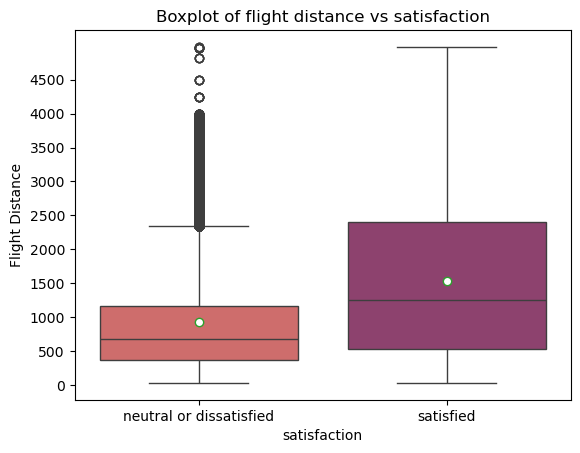

In [67]:
sns.boxplot(data=dataset,x='satisfaction',y='Flight Distance',palette='flare',showmeans=True,meanprops={'marker':'o','markerfacecolor':'white'})
plt.title('Boxplot of flight distance vs satisfaction')
plt.yticks(np.arange(0,5000,500))
plt.show()

#### The boxplot shows that median flight distance of statisfied passengers is greater than the 75th percentile of neutral or dissatisfied passengers. Also , satisfied passengers have travelled to the destination which are very far from the departure airports. However,some of the  neutral or dissatisfied passegers have also travelled a greater distance which are considered as outliers by the boxplot.

### Let's do hypothesis testing to see if flight distance matters the satisfaction.

#### Ho: The distributions of flight distances for satisfied and dissatisfied passengers are the same.
#### H1:  The distribution of flight distances for satisfied passengers is stochastically greater than the distribution for dissatisfied passengers.

In [68]:
from scipy.stats import mannwhitneyu


flight_distance_satisfied = dataset[dataset['satisfaction'] == 'satisfied']['Flight Distance']
flight_distance_dissatisfied = dataset[dataset['satisfaction'] == 'neutral or dissatisfied']['Flight Distance']

flight_distance_satisfied=flight_distance_satisfied.values.tolist()
flight_distance_satisfied=random.sample(flight_distance_satisfied,100)
flight_distance_dissatisfied=flight_distance_dissatisfied.values.tolist()
flight_distance_dissatisfied=random.sample(flight_distance_dissatisfied,100)

In [69]:
statistic, p_value = mannwhitneyu(flight_distance_satisfied, flight_distance_dissatisfied, alternative='greater')
p_value

0.003771427942573794

In [70]:
if p_value<0.05:
    print('We reject null hypothesis : Hence there is a significant difference in flight distances between satisfied and dissatisfied passenger')
else:
    print('Fail to reject null hypothesis: Hence, there is no significant difference.')

We reject null hypothesis : Hence there is a significant difference in flight distances between satisfied and dissatisfied passenger


#####
### <font color='pink'>6.2.3.INFLIGHT WIFI SERVICE VS SATISFACTION</font>
#####

Text(0.5, 1.0, 'Boxplot of Inflight wifi service vs Satisfaction')

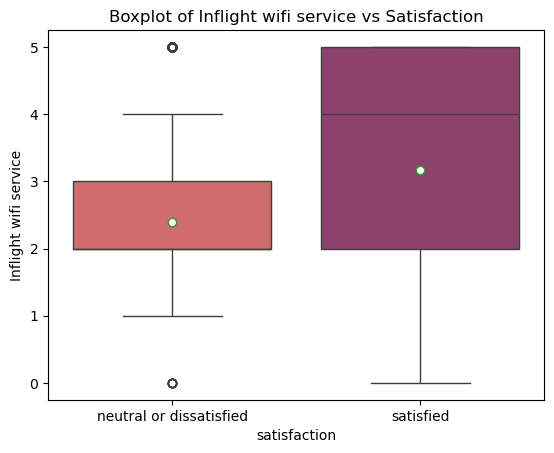

In [71]:
sns.boxplot(data=dataset,x='satisfaction',y='Inflight wifi service',showmeans=True,meanprops={'marker':'o','markerfacecolor':'white'},palette='flare')
plt.title('Boxplot of Inflight wifi service vs Satisfaction')

#### The boxplot shows that neutral or dissatisfied passengers have not given excellent inflight wifi service rating very often whereas for 50% satisfied passenger inflight wifi service feedback is very high/excellent satisfaction. 

### Lets do hypothesis testing to see if inflight wifi service determines satisfaction.

#### Null Hypothesis (Ho): There is no association between the satisfaction level of the inflight wifi service and passenger satisfaction.
#### Alternative Hypothesis (H1): There is an association between the satisfaction level of the inflight wifi service and passenger satisfaction.

In [72]:
sampled_data = dataset.sample(frac=0.06)
c_t=pd.crosstab(sampled_data['Inflight wifi service'],sampled_data['satisfaction'])
c_t

satisfaction,neutral or dissatisfied,satisfied
Inflight wifi service,,
0,0,202
1,736,341
2,1151,385
3,1204,390
4,452,673
5,5,695


In [73]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(c_t)
print(expected)

[[114.96567212  87.03432788]
 [612.96053898 464.03946102]
 [874.19441771 661.80558229]
 [907.20436317 686.79563683]
 [640.27911453 484.72088547]
 [398.39589349 301.60410651]]


In [74]:
if p<0.05:
    print('Reject Null Hypothesis ,Hence There is an association between the satisfaction level of the inflight wifi service and passenger satisfaction.')
else:
    print('Fail to reject Null Hypothesis,Hence There is no association between the satisfaction level of the inflight wifi service and passenger satisfaction.')

Reject Null Hypothesis ,Hence There is an association between the satisfaction level of the inflight wifi service and passenger satisfaction.


#####
### <font color='pink'>6.2.4.AGE VS DEPARTURE/ARRIVAL TIME CONVENIENT</font>
#####

Text(0.5, 1.0, 'Boxplot of Departure/Arrival time convenient vs satisfaction')

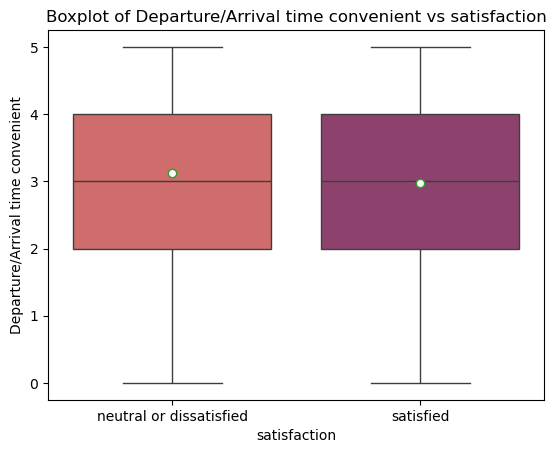

In [75]:
sns.boxplot(data=dataset,x='satisfaction',y='Departure/Arrival time convenient',palette='flare',showmeans=True,meanprops={'marker':'o','markerfacecolor':'white'})
plt.title('Boxplot of Departure/Arrival time convenient vs satisfaction')

#### From the boxplot it is seen that for both neutral/dissatisfied and satisfied passengers , most of the  readings remain same .The average departure/arrival time satisfaction of satisfied passengers is lower than those of neutral/dissatisfied passengers.
### Lets do hypothesis testing to see if departure/arrival time convenien determines satisfaction.

#### Null Hypothesis (Ho): There is no association between the satisfaction level of the departure/arrival time convenient and overall passenger satisfaction.
#### Alternative Hypothesis (H1): There is an association between the satisfaction level of  the departure/arrival time convenient and overall passenger satisfaction.

In [76]:
sampled_data = dataset.sample(frac=0.06)
c_t=pd.crosstab(sampled_data['Departure/Arrival time convenient'],sampled_data['satisfaction'])
c_t

satisfaction,neutral or dissatisfied,satisfied
Departure/Arrival time convenient,,
0,187,121
1,472,483
2,504,464
3,646,484
4,932,568
5,789,584


In [77]:
chi2, p, dof, expected = chi2_contingency(c_t)
print(expected)

[[174.40487648 133.59512352]
 [540.76836702 414.23163298]
 [548.12961181 419.87038819]
 [639.86204684 490.13795316]
 [849.37439846 650.62560154]
 [777.46069939 595.53930061]]


In [78]:
if p<0.05:
    print('Reject Null Hypothesis ,Hence There is an association between the satisfaction level of departure/arrival time convenient and passenger satisfaction.')
else:
    print('Fail to reject Null Hypothesis,Hence There is no association between the satisfaction level of the departure/arrival time convenient and passenger satisfaction.')

Reject Null Hypothesis ,Hence There is an association between the satisfaction level of departure/arrival time convenient and passenger satisfaction.


Text(0.5, 1.0, 'Boxplot of Ease of Online booking vs satisfaction')

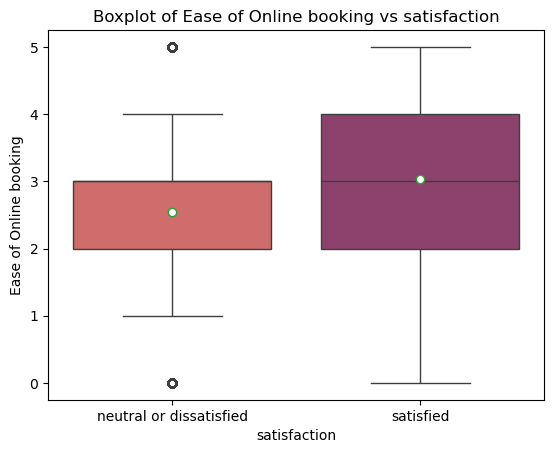

In [79]:
#Ease of Online booking vs satisfaction
sns.boxplot(data=dataset,x='satisfaction',y='Ease of Online booking',palette='flare',showmeans=True,meanprops={'marker':'o','markerfacecolor':'white'})
plt.title('Boxplot of Ease of Online booking vs satisfaction')

#### From the boxplot between ease of online booking and satisfaction ,it is found that 50% of satisfied passengers have given the ease of online booking with very high and excellent satisfaction. Simlary, the 75th percentile of neutral or dissatisfied passengers have given moderate ,poor and average satisfaction.

### Lets do hypothesis testing to see if departure/arrival time convenien determines satisfaction.

#### Null Hypothesis (Ho): There is no association between the satisfaction level of the Ease of Online booking and overall passenger satisfaction.
#### Alternative Hypothesis (H1): There is an association between the satisfaction level of  Ease of Online booking and overall passenger satisfaction.

In [80]:
sampled_data = dataset.sample(frac=0.1)
c_t=pd.crosstab(sampled_data['Ease of Online booking'],sampled_data['satisfaction'])
c_t

satisfaction,neutral or dissatisfied,satisfied
Ease of Online booking,,
0,152,299
1,1082,667
2,1601,754
3,1678,741
4,920,1026
5,374,1096


In [81]:
chi2, p, dof, expected = chi2_contingency(c_t)
print(expected)

[[ 252.06515881  198.93484119]
 [ 977.52098171  771.47901829]
 [1316.21607315 1038.78392685]
 [1351.98585178 1067.01414822]
 [1087.62483157  858.37516843]
 [ 821.58710298  648.41289702]]


In [82]:
if p<0.05:
    print('Reject Null Hypothesis ,Hence There is an association between the satisfaction level of online booking and passenger satisfaction.')
else:
    print('Fail to reject Null Hypothesis,Hence There is no association between the satisfaction level of online booking and passenger satisfaction.')

Reject Null Hypothesis ,Hence There is an association between the satisfaction level of online booking and passenger satisfaction.


Text(0.5, 1.0, 'Boxplot of Gate Location vs satisfaction')

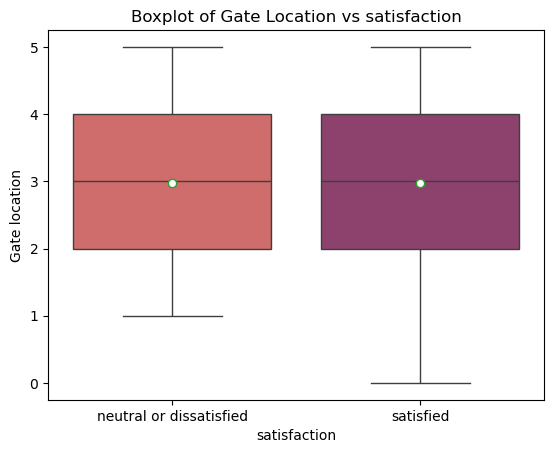

In [83]:
#Gate location vs satisfaction
sns.boxplot(data=dataset,x='satisfaction',y='Gate location',palette='flare',showmeans=True,meanprops={'marker':'o','markerfacecolor':'white'})
plt.title('Boxplot of Gate Location vs satisfaction')

#### From the boxplot , for both satisfied and neutral/dissatisfied passengers level of satisfaction of Gate Location remains same .Lets see if it effects the overall satisfaction of passengers.

### Hypothesis Testing

In [84]:
sampled_data = dataset.sample(frac=0.1)
c_t=pd.crosstab(sampled_data['Gate location'],sampled_data['satisfaction'])
c_t

satisfaction,neutral or dissatisfied,satisfied
Gate location,,
1,864,930
2,1063,938
3,1816,961
4,1462,970
5,582,804


In [85]:
chi2, p, dof, expected = chi2_contingency(c_t)
if p<0.05:
    print('Reject Null Hypothesis ,Hence There is an association between the satisfaction level of Gate location and passenger satisfaction.')
else:
    print('Fail to reject Null Hypothesis,Hence There is no association between the satisfaction level of Gate location and passenger satisfaction.')

Reject Null Hypothesis ,Hence There is an association between the satisfaction level of Gate location and passenger satisfaction.


Text(0.5, 1.0, 'Boxplot of Food and drink vs satisfaction')

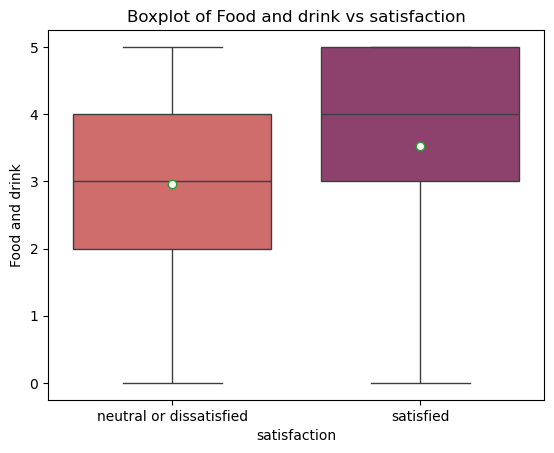

In [86]:
#Food and Drink vs satisfaction
sns.boxplot(data=dataset,x='satisfaction',y='Food and drink',palette='flare',showmeans=True,meanprops={'marker':'o','markerfacecolor':'white'})
plt.title('Boxplot of Food and drink vs satisfaction')

#### 50% of the satisfied passengers have given very high and excellent satisfaction of Food and Drink service .Also maximum of neutral or dissatisfied customers have given above average satisfaction of this service.

### Hypothesis Testing

In [87]:
sampled_data = dataset.sample(frac=0.1)
c_t=pd.crosstab(sampled_data['Food and drink'],sampled_data['satisfaction'])
c_t

satisfaction,neutral or dissatisfied,satisfied
Food and drink,,
0,4,3
1,1046,252
2,1369,855
3,1389,855
4,1116,1303
5,993,1205


In [88]:
chi2, p, dof, expected = chi2_contingency(c_t)
if p<0.05:
    print('Reject Null Hypothesis ,Hence There is an association between the satisfaction level of Food and Drink and passenger satisfaction.')
else:
    print('Fail to reject Null Hypothesis,Hence There is no association between the satisfaction level of Food and Drink satisfaction.')

Reject Null Hypothesis ,Hence There is an association between the satisfaction level of Food and Drink and passenger satisfaction.


Text(0.5, 1.0, 'Boxplot of Online boarding vs satisfaction')

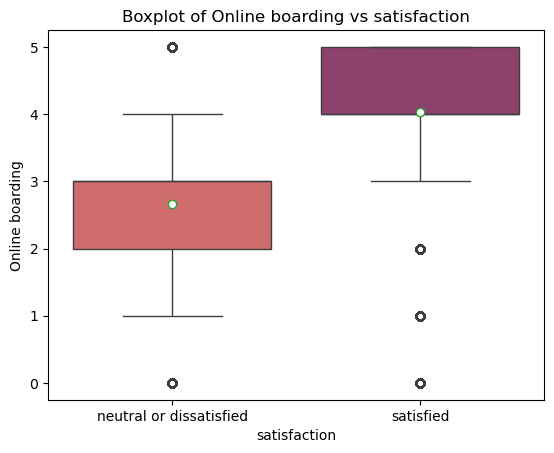

In [89]:
#online boarding vs satisfaction
sns.boxplot(data=dataset,x='satisfaction',y='Online boarding',palette='flare',showmeans=True,meanprops={'marker':'o','markerfacecolor':'white'})
plt.title('Boxplot of Online boarding vs satisfaction')

#### From the boxplot ,it is clearly seen that satisfied passengers have always given satisfaction level of online boarding with very high and excellent satisfaction .The dissatisfied passengers' level of satisfaction for online boarding lies in between poor-average satisfaction. Some of the  passengers were not applicaple in the survey to give feedback for both of the groups.

### Hypothesis Testing 

In [90]:
sampled_data = dataset.sample(frac=0.1)
c_t=pd.crosstab(sampled_data['Online boarding'],sampled_data['satisfaction'])
c_t

satisfaction,neutral or dissatisfied,satisfied
Online boarding,,
0,122,133
1,930,158
2,1577,186
3,1888,286
4,1165,1926
5,237,1782


In [91]:
chi2, p, dof, expected = chi2_contingency(c_t)
if p<0.05:
    print('Reject Null Hypothesis ,Hence There is an association between the satisfaction level of Online boarding and passenger satisfaction.')
else:
    print('Fail to reject Null Hypothesis,Hence There is no association between the satisfaction level of Online Boarding and overall passenger satisfaction.')

Reject Null Hypothesis ,Hence There is an association between the satisfaction level of Online boarding and passenger satisfaction.


Text(0.5, 1.0, 'Boxplot of Seat comfort vs satisfaction')

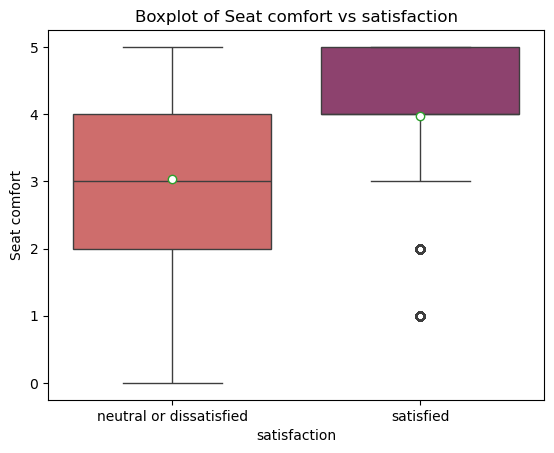

In [92]:
#Seat comfort vs Satisfaction
sns.boxplot(data=dataset,x='satisfaction',y='Seat comfort',palette='flare',showmeans=True,meanprops={'marker':'o','markerfacecolor':'white'})
plt.title('Boxplot of Seat comfort vs satisfaction')

#### From the boxplot ,it is clearly seen that satisfied passengers have always given satisfaction level of seat comfort with very high and excellent satisfaction .The dissatisfied passengers' level of satisfaction for seat comfort  lies in between not applicable to excellent satisfaction with 50% of passengers giving feedback above average satisfaction.

### Hypothesis Testing 

In [93]:
sampled_data = dataset.sample(frac=0.1)
c_t=pd.crosstab(sampled_data['Seat comfort'],sampled_data['satisfaction'])
c_t

satisfaction,neutral or dissatisfied,satisfied
Seat comfort,,
1,950,265
2,1117,316
3,1542,382
4,1375,1788
5,914,1741


In [94]:
chi2, p, dof, expected = chi2_contingency(c_t)
if p<0.05:
    print('Reject Null Hypothesis ,Hence There is an association between the satisfaction level of Seat Comfort and passenger satisfaction.')
else:
    print('Fail to reject Null Hypothesis,Hence There is no association between the satisfaction level of Seat Comfort and overall passenger satisfaction.')

Reject Null Hypothesis ,Hence There is an association between the satisfaction level of Seat Comfort and passenger satisfaction.


Text(0.5, 1.0, 'Boxplot of Inflight Entertainment vs satisfaction')

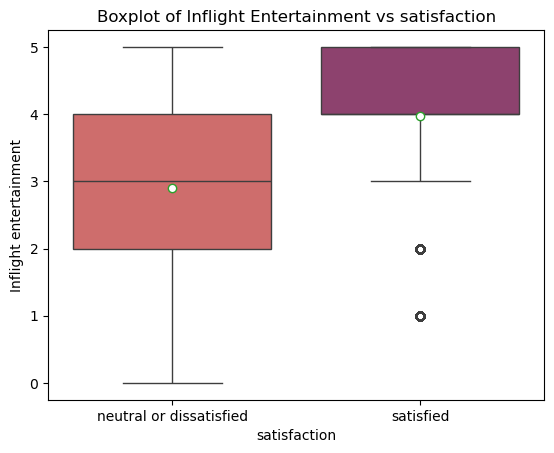

In [95]:
#Inflight entertainment vs Satisfaction
sns.boxplot(data=dataset,x='satisfaction',y='Inflight entertainment',palette='flare',showmeans=True,meanprops={'marker':'o','markerfacecolor':'white'})
plt.title('Boxplot of Inflight Entertainment vs satisfaction')

#### From the boxplot ,it is clearly seen that satisfied passengers have always given satisfaction level of inflight entertainment with very high and excellent satisfaction .The dissatisfied passengers' level of satisfaction for inflight entertainment llies in between not applicable to excellent satisfaction with 50% of passengers giving feedback above average satisfaction.

### Hypothesis Testing 

In [96]:
sampled_data = dataset.sample(frac=0.1)
c_t=pd.crosstab(sampled_data['Inflight entertainment'],sampled_data['satisfaction'])
c_t

satisfaction,neutral or dissatisfied,satisfied
Inflight entertainment,,
0,3,0
1,1096,148
2,1386,372
3,1335,508
4,1115,1782
5,896,1749


In [97]:
chi2, p, dof, expected = chi2_contingency(c_t)
if p<0.05:
    print('Reject Null Hypothesis ,Hence There is an association between the satisfaction level of Inflight entertainment and passenger satisfaction.')
else:
    print('Fail to reject Null Hypothesis,Hence There is no association between the satisfaction level of Inflight entertainment and overall passenger satisfaction.')

Reject Null Hypothesis ,Hence There is an association between the satisfaction level of Inflight entertainment and passenger satisfaction.


Text(0.5, 1.0, 'Boxplot of On-board service vs satisfaction')

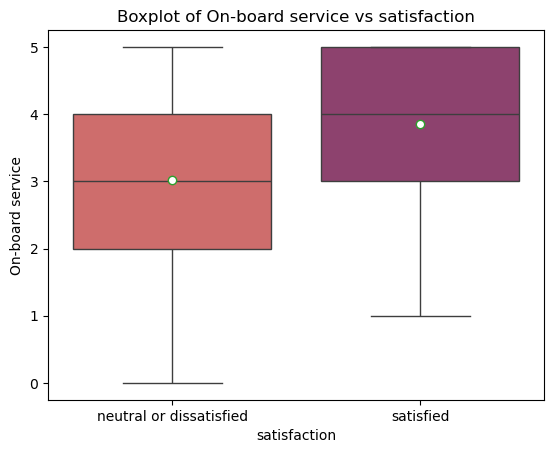

In [98]:
#On-board service vs satisfaction
sns.boxplot(data=dataset,x='satisfaction',y='On-board service',palette='flare',showmeans=True,meanprops={'marker':'o','markerfacecolor':'white'})
plt.title('Boxplot of On-board service vs satisfaction')

#### From the boxplot , satisfaction level of on-board service for neutral/dissatisfied passengers ranges from not applicable-excellent satisfaction with median satisfaction as average satisfaction whereas for satisfied passengers , on board service satisfaction looks good.

### Hypothesis Testing

In [99]:
sampled_data = dataset.sample(frac=0.1)
c_t=pd.crosstab(sampled_data['On-board service'],sampled_data['satisfaction'])
c_t

satisfaction,neutral or dissatisfied,satisfied
On-board service,,
1,937,231
2,1064,396
3,1590,707
4,1450,1638
5,886,1491


In [100]:
chi2, p, dof, expected = chi2_contingency(c_t)
if p<0.05:
    print('Reject Null Hypothesis ,Hence There is an association between the satisfaction level of On-board service and passenger satisfaction.')
else:
    print('Fail to reject Null Hypothesis,Hence There is no association between the satisfaction level of On-board service and overall passenger satisfaction.')

Reject Null Hypothesis ,Hence There is an association between the satisfaction level of On-board service and passenger satisfaction.


Text(0.5, 1.0, 'Boxplot of Leg room service vs satisfaction')

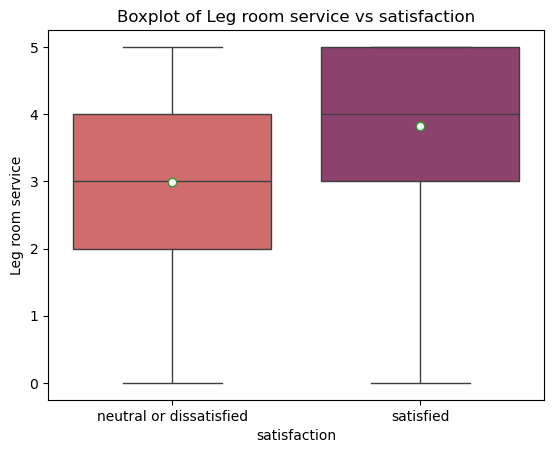

In [101]:
#Leg room service vs satisfaction
sns.boxplot(data=dataset,x='satisfaction',y='Leg room service',palette='flare',showmeans=True,meanprops={'marker':'o','markerfacecolor':'white'})
plt.title('Boxplot of Leg room service vs satisfaction')

### Hypothesis Testing

In [102]:
sampled_data = dataset.sample(frac=0.1)
c_t=pd.crosstab(sampled_data['Leg room service'],sampled_data['satisfaction'])
c_t

satisfaction,neutral or dissatisfied,satisfied
Leg room service,,
0,20,16
1,778,214
2,1434,564
3,1422,538
4,1227,1705
5,943,1529


In [103]:
chi2, p, dof, expected = chi2_contingency(c_t)
if p<0.05:
    print('Reject Null Hypothesis ,Hence There is an association between the satisfaction level of Leg room service and passenger satisfaction.')
else:
    print('Fail to reject Null Hypothesis,Hence There is no association between the satisfaction level of Leg room service and overall passenger satisfaction.')

Reject Null Hypothesis ,Hence There is an association between the satisfaction level of Leg room service and passenger satisfaction.


Text(0.5, 1.0, 'Boxplot of Baggage handling vs satisfaction')

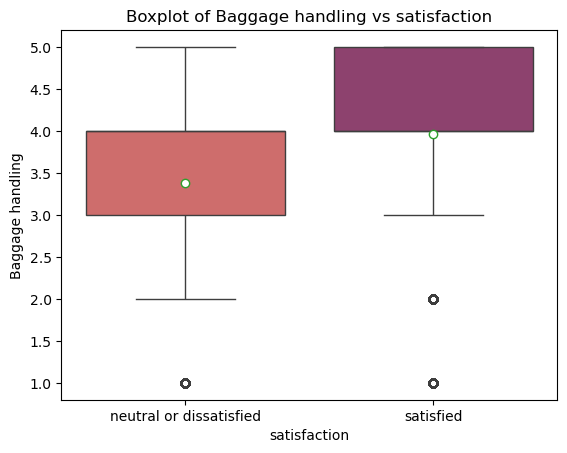

In [104]:
#Baggage handling vs online boarding
sns.boxplot(data=dataset,x='satisfaction',y='Baggage handling',palette='flare',showmeans=True,meanprops={'marker':'o','markerfacecolor':'white'})
plt.title('Boxplot of Baggage handling vs satisfaction')

### Hypothesis Testing

In [105]:
sampled_data = dataset.sample(frac=0.1)
c_t=pd.crosstab(sampled_data['Baggage handling'],sampled_data['satisfaction'])
c_t

satisfaction,neutral or dissatisfied,satisfied
Baggage handling,,
1,481,234
2,834,356
3,1533,488
4,1938,1835
5,1026,1665


In [106]:
chi2, p, dof, expected = chi2_contingency(c_t)
if p<0.05:
    print('Reject Null Hypothesis ,Hence There is an association between the satisfaction level of Baggage handling and passenger satisfaction.')
else:
    print('Fail to reject Null Hypothesis,Hence There is no association between the satisfaction level of Baggage handling and overall passenger satisfaction.')

Reject Null Hypothesis ,Hence There is an association between the satisfaction level of Baggage handling and passenger satisfaction.


Text(0.5, 1.0, 'Boxplot of Checkin service vs satisfaction')

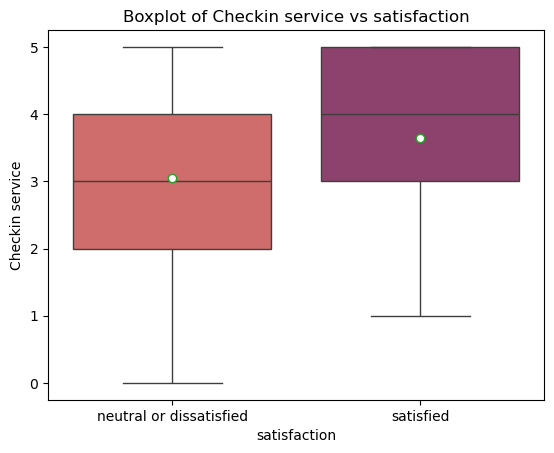

In [107]:
#Checkin service vs satisfaction
sns.boxplot(data=dataset,x='satisfaction',y='Checkin service',palette='flare',showmeans=True,meanprops={'marker':'o','markerfacecolor':'white'})
plt.title('Boxplot of Checkin service vs satisfaction')

In [108]:
sampled_data = dataset.sample(frac=0.1)
c_t=pd.crosstab(sampled_data['Checkin service'],sampled_data['satisfaction'])
c_t

satisfaction,neutral or dissatisfied,satisfied
Checkin service,,
1,968,292
2,953,320
3,1537,1304
4,1613,1316
5,828,1259


In [109]:
chi2, p, dof, expected = chi2_contingency(c_t)
if p<0.05:
    print('Reject Null Hypothesis ,Hence There is an association between the satisfaction level of Checkin service and passenger satisfaction.')
else:
    print('Fail to reject Null Hypothesis,Hence There is no association between the satisfaction level of Checkin service and overall passenger satisfaction.')

Reject Null Hypothesis ,Hence There is an association between the satisfaction level of Checkin service and passenger satisfaction.


Text(0.5, 1.0, 'Boxplot of Inflight service vs satisfaction')

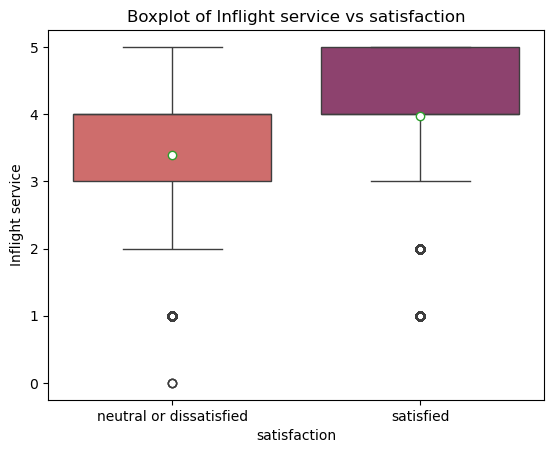

In [110]:
#Inflight service vs satisfaction
sns.boxplot(data=dataset,x='satisfaction',y='Inflight service',palette='flare',showmeans=True,meanprops={'marker':'o','markerfacecolor':'white'})
plt.title('Boxplot of Inflight service vs satisfaction')

### Hypothesis Testing

In [111]:
sampled_data = dataset.sample(frac=0.1)
c_t=pd.crosstab(sampled_data['Inflight service'],sampled_data['satisfaction'])
c_t

satisfaction,neutral or dissatisfied,satisfied
Inflight service,,
1,495,203
2,792,338
3,1522,485
4,2068,1807
5,1037,1643


In [112]:
chi2, p, dof, expected = chi2_contingency(c_t)
if p<0.05:
    print('Reject Null Hypothesis ,Hence There is an association between the satisfaction level of Inflight service and passenger satisfaction.')
else:
    print('Fail to reject Null Hypothesis,Hence There is no association between the satisfaction level of Inflight service and overall passenger satisfaction.')

Reject Null Hypothesis ,Hence There is an association between the satisfaction level of Inflight service and passenger satisfaction.


Text(0.5, 1.0, 'Boxplot of Cleanliness vs satisfaction')

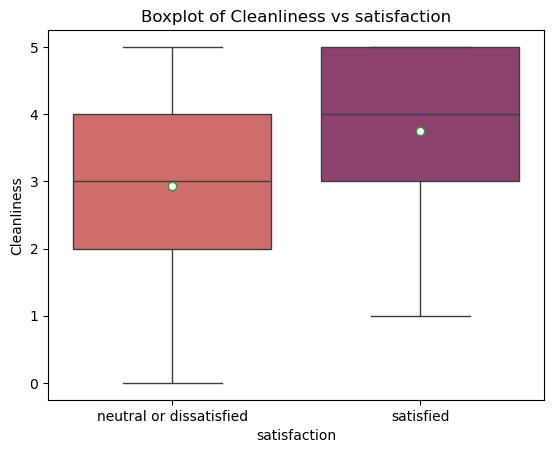

In [113]:
#Cleanliness vs satisfaction
sns.boxplot(data=dataset,x='satisfaction',y='Cleanliness',palette='flare',showmeans=True,meanprops={'marker':'o','markerfacecolor':'white'})
plt.title('Boxplot of Cleanliness vs satisfaction')

### Hypothesis Testing

In [114]:
chi2, p, dof, expected = chi2_contingency(c_t)
if p<0.05:
    print('Reject Null Hypothesis ,Hence There is an association between the satisfaction level of Cleanliness and passenger satisfaction.')
else:
    print('Fail to reject Null Hypothesis,Hence There is no association between the satisfaction level of Cleanliness and overall passenger satisfaction.')

Reject Null Hypothesis ,Hence There is an association between the satisfaction level of Cleanliness and passenger satisfaction.


Text(0.5, 1.0, 'Departure Delay in Minutes vs satisfaction')

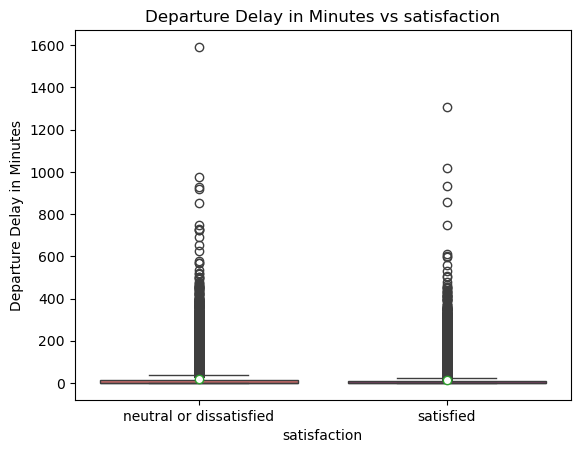

In [115]:
#Departure Delay in Minutes vs satisfaction
sns.boxplot(data=dataset,x='satisfaction',y='Departure Delay in Minutes',palette='flare',showmeans=True,meanprops={'marker':'o','markerfacecolor':'white'})
plt.title('Departure Delay in Minutes vs satisfaction')

In [116]:
#Departure delay in minutes vs satisfaction
dep_delay=dataset[np.abs(stats.zscore(dataset['Departure Delay in Minutes'])<3)]
dep_delay_dissatisfied=dep_delay[dep_delay['satisfaction']=='neutral or dissatisfied']['Departure Delay in Minutes']
dep_delay_satisfied=dep_delay[dep_delay['satisfaction']=='satisfied']['Departure Delay in Minutes']


dep_delay_dissatisfied=dep_delay_dissatisfied.values.tolist()
dep_delay_dissatisfied=random.sample(dep_delay_dissatisfied,100)
dep_delay_satisfied=dep_delay_satisfied.values.tolist()
dep_delay_satisfied=random.sample(dep_delay_satisfied,100)

In [117]:
statistic, p_value = mannwhitneyu(dep_delay_satisfied, dep_delay_dissatisfied, alternative='greater')

if p_value<0.05:
    print('We reject null hypothesis : Hence there is a significant difference in departure delay  between satisfied and dissatisfied passenger')
else:
    print('Fail to reject null hypothesis: Hence, there is no significant difference.')

Fail to reject null hypothesis: Hence, there is no significant difference.


#### Conclusion:
#### From statistical analysis using Man-Whitney U-test , it is proved that There is no signification difference in the satisfaction of passengers based on Departure Delay

Text(0.5, 1.0, 'Arrival Delay in Minutes vs satisfaction')

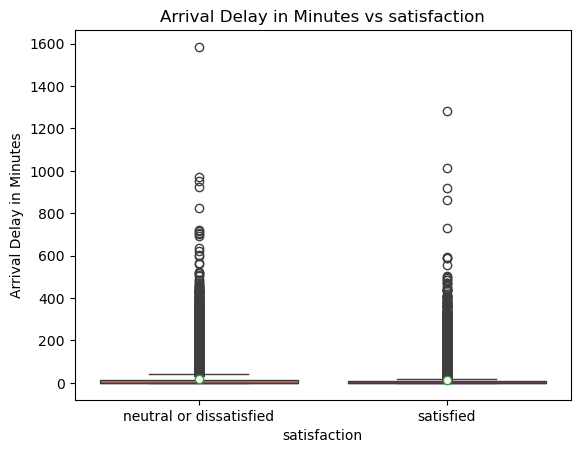

In [118]:
#Arrival Delay in Minutes vs satisfaction
sns.boxplot(data=dataset,x='satisfaction',y='Arrival Delay in Minutes',palette='flare',showmeans=True,meanprops={'marker':'o','markerfacecolor':'white'})
plt.title('Arrival Delay in Minutes vs satisfaction')

In [119]:
arr_delay=dataset[np.abs(stats.zscore(dataset['Arrival Delay in Minutes'])<3)]
arr_delay_dissatisfied=arr_delay[arr_delay['satisfaction']=='neutral or dissatisfied']['Arrival Delay in Minutes']
arr_delay_satisfied=arr_delay[arr_delay['satisfaction']=='satisfied']['Arrival Delay in Minutes']


arr_delay_dissatisfied=arr_delay_dissatisfied.values.tolist()
arr_delay_dissatisfied=random.sample(arr_delay_dissatisfied,100)
arr_delay_satisfied=arr_delay_satisfied.values.tolist()
arr_delay_satisfied=random.sample(arr_delay_satisfied,100)

In [120]:
statistic, p_value = mannwhitneyu(arr_delay_satisfied, arr_delay_dissatisfied, alternative='greater')

if p_value<0.05:
    print('We reject null hypothesis : Hence there is a significant difference in arrival delay  between satisfied and dissatisfied passenger')
else:
    print('Fail to reject null hypothesis: Hence, there is no significant difference.')

Fail to reject null hypothesis: Hence, there is no significant difference.


#### Conclusion:
#### From statistical analysis using Man-Whitney U-test , it is proved that There is no signification difference in the satisfaction of passengers based on Arrival Delay

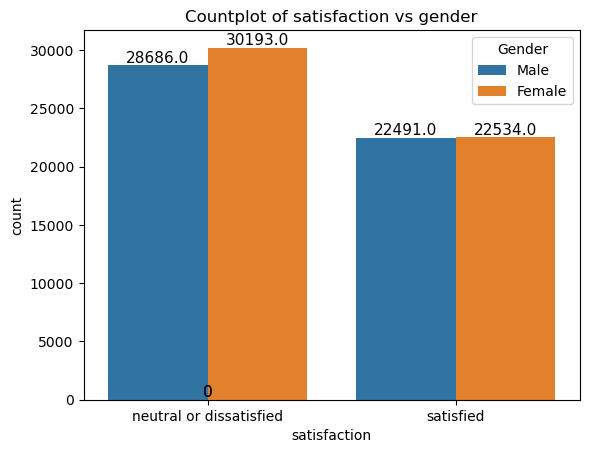

In [121]:
#Gender vs satisfaction 
sns.countplot(data=dataset,x='satisfaction',hue='Gender')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       fontsize=11, color='black',
                       xytext=(0, 5),
                       textcoords='offset points')
plt.title('Countplot of satisfaction vs gender')
plt.show()

#### From the countplot:
#### Among the neutral/dissatisfied passengers, Female numbers is high which is 30,193 compared to male numbers which counts to 28,686.
#### 22,534 passengers are Females among the satisfied passengers whereas, 22,491 passengers comprise of males.
#### In conclusion , for both groups , females exceed the male counts also, we can conclude that Females travel more often than Males.

### Lets do Hypothesis Testing to see if gender decribes satisfaction.


In [122]:
sampled_data = dataset.sample(frac=0.1)
c_t=pd.crosstab(sampled_data['Gender'],sampled_data['satisfaction'])
c_t

satisfaction,neutral or dissatisfied,satisfied
Gender,,
Female,3103,2228
Male,2877,2182


In [123]:
chi2, p, dof, expected = chi2_contingency(c_t)
if p<0.05:
    print('Reject Null Hypothesis ,Hence There is an association between the Gender  and passenger satisfaction.')
else:
    print('Fail to reject Null Hypothesis,Hence There is no association between Gender and overall passenger satisfaction.')

Fail to reject Null Hypothesis,Hence There is no association between Gender and overall passenger satisfaction.


### Final Conclusion
#### From Chi^2 test , it is found that the Gender of passenger cannot distinguish the satisfaction of passengers.

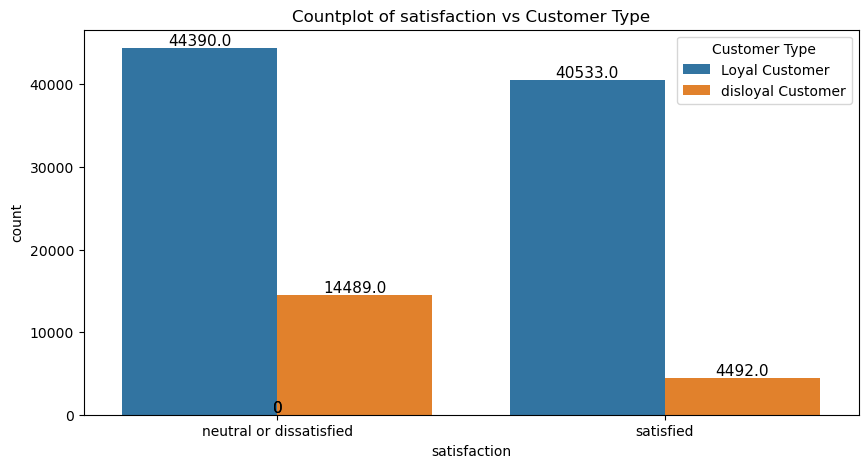

In [124]:
#Customer Type and satisfaction
plt.figure(figsize=(10,5))
sns.countplot(data=dataset,x='satisfaction',hue='Customer Type')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       fontsize=11, color='black',
                       xytext=(0, 5),
                       textcoords='offset points')
plt.title('Countplot of satisfaction vs Customer Type')
plt.show()

#### From the countplot , it is clear maximum number of passengers are Loyal Customer for both satisfied and dissatisfied passengers. However, There are more numbers of Disloyal customer for neutral/dissatisfied group as compared to satisfied group.

### Hypothesis Testing to see if Types of Customers effect satisfaction

In [125]:
sampled_data = dataset.sample(frac=0.1)
c_t=pd.crosstab(sampled_data['Customer Type'],sampled_data['satisfaction'])
c_t

satisfaction,neutral or dissatisfied,satisfied
Customer Type,,
Loyal Customer,4432,4049
disloyal Customer,1485,424


In [126]:
chi2, p, dof, expected = chi2_contingency(c_t)
if p<0.05:
    print('Reject Null Hypothesis ,Hence There is an association between Type of Customer and passenger satisfaction.')
else:
    print('Fail to reject Null Hypothesis,Hence There is no association between Type of Customer and overall passenger satisfaction.')

Reject Null Hypothesis ,Hence There is an association between Type of Customer and passenger satisfaction.


### Final Conclusion
#### From Chi^2 test , it is found that the Types of  passenger(Loyal /Disloyal)  distinguish the satisfaction of passengers.

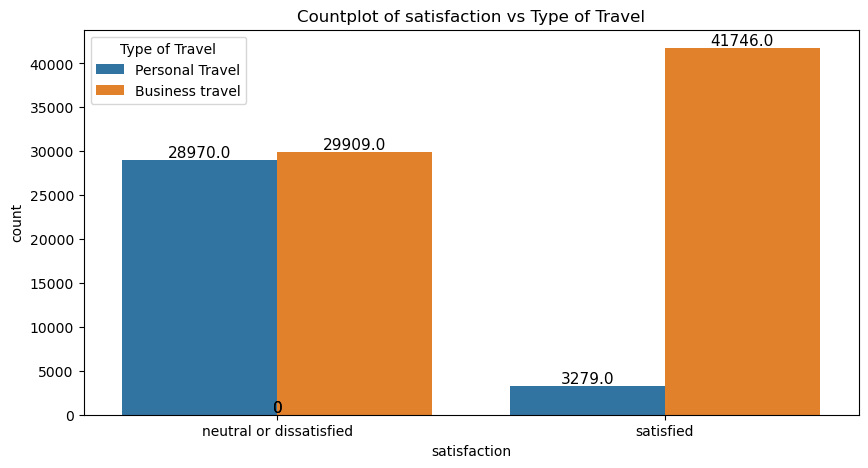

In [127]:
#Type of Travel vs satisfaction
plt.figure(figsize=(10,5))
sns.countplot(data=dataset,x='satisfaction',hue='Type of Travel')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       fontsize=11, color='black',
                       xytext=(0, 5),
                       textcoords='offset points')
plt.title('Countplot of satisfaction vs Type of Travel')
plt.show()

#### From the countplot, it is found that, most of the satisfied passengers have flights for Business reasons(41,746) whereas 3,279 satisfied passengers go for Personal reasons.
#### The neutral/dissatisfied passengers have more number of Business travel (29,909) than Personal travel(28,970).

In [128]:
sampled_data = dataset.sample(frac=0.1)
c_t=pd.crosstab(sampled_data['Type of Travel'],sampled_data['satisfaction'])
c_t

satisfaction,neutral or dissatisfied,satisfied
Type of Travel,,
Business travel,2971,4208
Personal Travel,2891,320


In [129]:
chi2, p, dof, expected = chi2_contingency(c_t)
if p<0.05:
    print('Reject Null Hypothesis ,Hence There is an association between Type of Travel and passenger satisfaction.')
else:
    print('Fail to reject Null Hypothesis,Hence There is no association between Type of Travel and overall passenger satisfaction.')

Reject Null Hypothesis ,Hence There is an association between Type of Travel and passenger satisfaction.


### Final Conclusion
#### From Chi^2 test , it is found that the Types of  Travel(Business/Personal) distinguish the satisfaction of passengers.

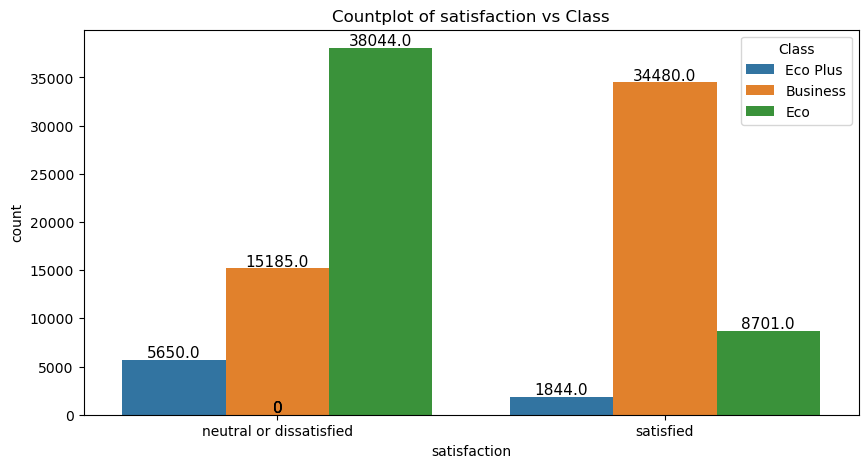

In [130]:
#class vs satisfaction
plt.figure(figsize=(10,5))
sns.countplot(data=dataset,x='satisfaction',hue='Class')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       fontsize=11, color='black',
                       xytext=(0, 5),
                       textcoords='offset points')
plt.title('Countplot of satisfaction vs Class')
plt.show()

#### Among Eco plus, Business and Eco classes, most of the satisfied passengers(34,480) travel in Business Class, then 8,701 travel in Eco class whereas only 1,844 passengers travel in Eco-plus class.
#### Most of the neutral/dissatisfied passengers travel in Eco class whereas 15,185 passengers travel in business class and only 5,650 travel in Eco-plus class.

In [131]:
sampled_data = dataset.sample(frac=0.1)
c_t=pd.crosstab(sampled_data['Class'],sampled_data['satisfaction'])
c_t

satisfaction,neutral or dissatisfied,satisfied
Class,,
Business,1539,3404
Eco,3823,892
Eco Plus,556,176


In [132]:
chi2, p, dof, expected = chi2_contingency(c_t)
if p<0.05:
    print('Reject Null Hypothesis ,Hence There is an association between class and passenger satisfaction.')
else:
    print('Fail to reject Null Hypothesis,Hence There is no association between class and overall passenger satisfaction.')

Reject Null Hypothesis ,Hence There is an association between class and passenger satisfaction.


### Final Conclusion
#### From Chi^2 test , it is found that the Type of Class(Business,Eco,Eco-plus)distinguish the satisfaction of passengers.

<Axes: >

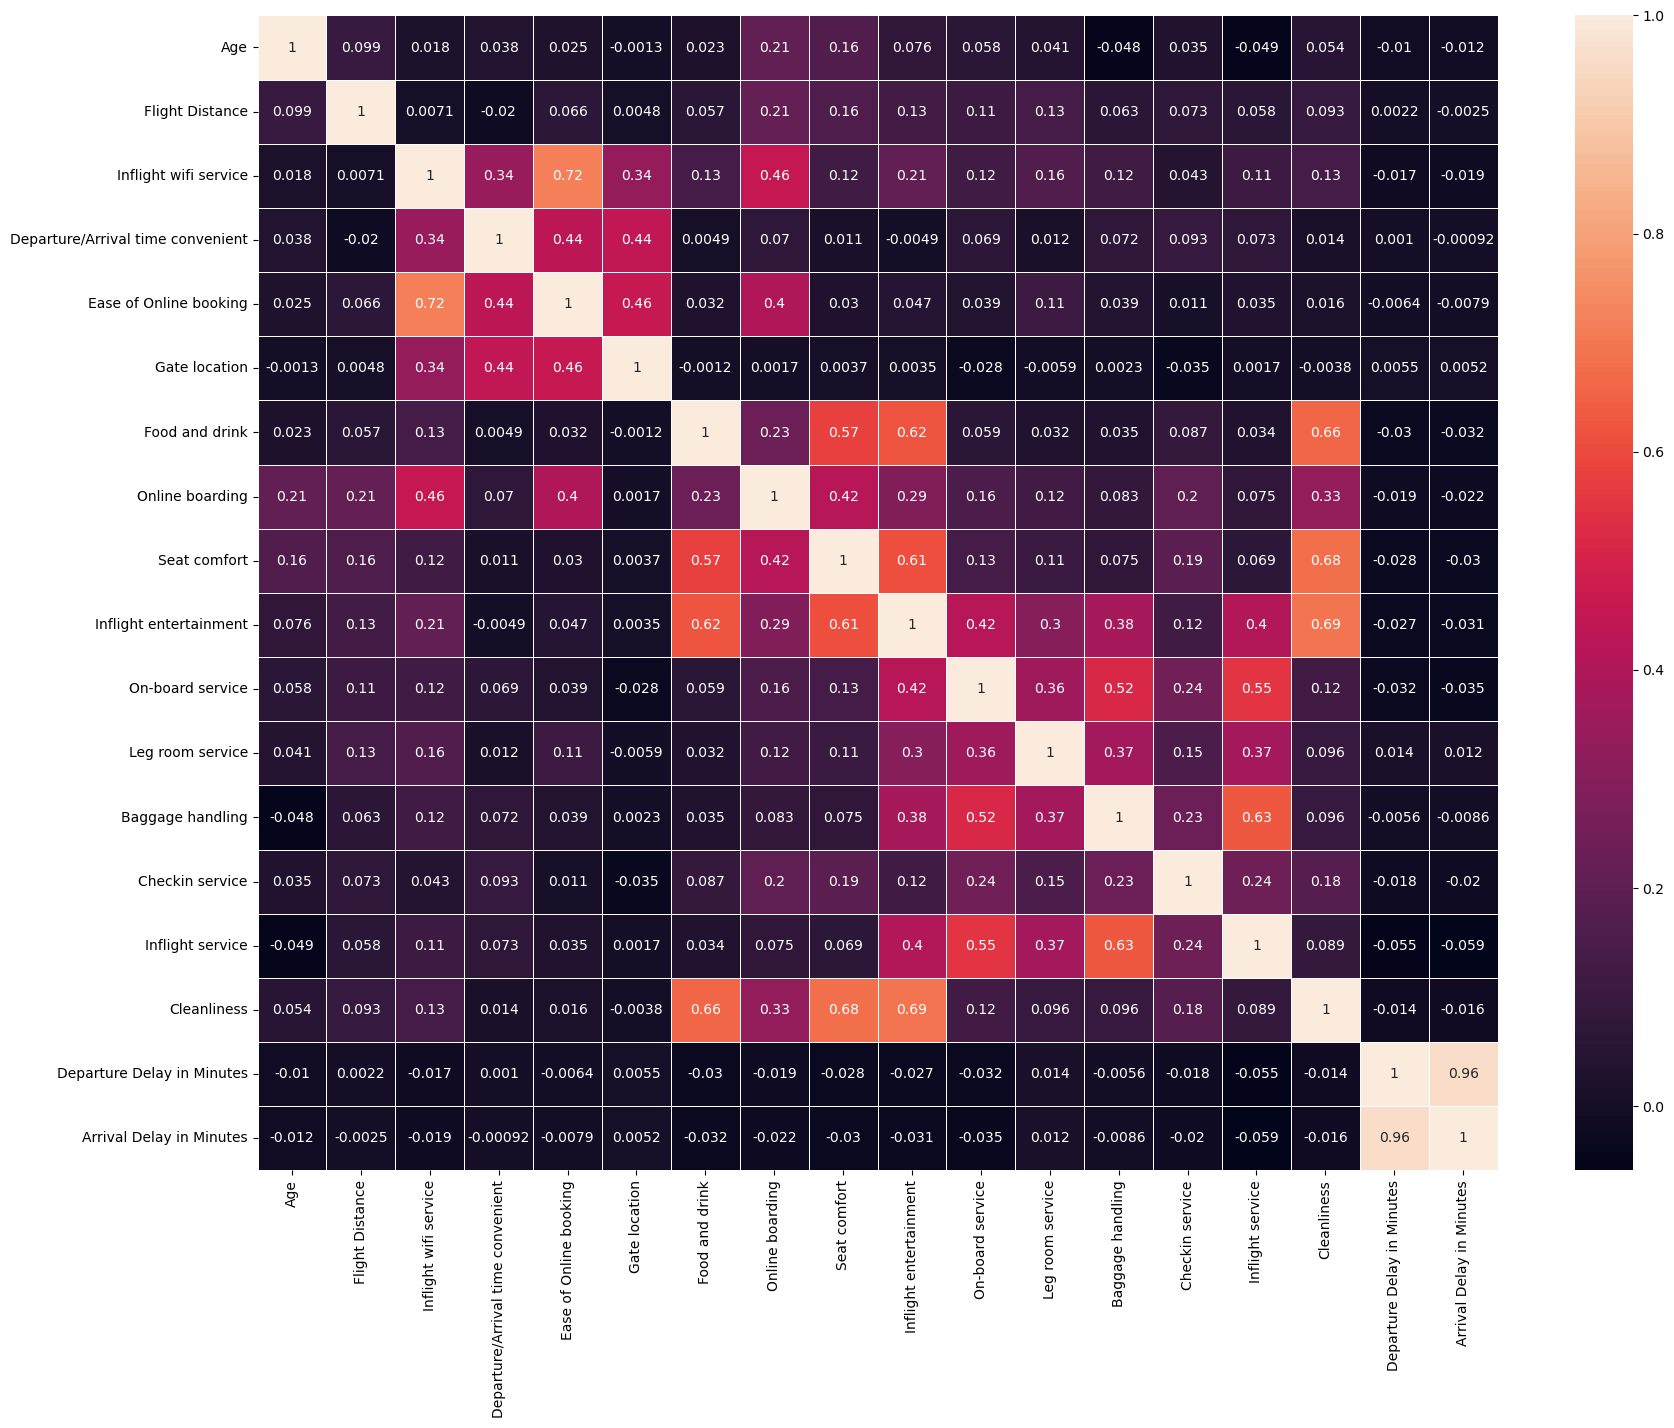

In [133]:
#multivariate analysis
plt.figure(figsize=(20,15))
corr_matrix=dataset.corr(numeric_only=True)
sns.heatmap(data=corr_matrix,annot=True,linewidths=0.4)

#### Observations:
#####
#### Arrival Delay in minutes and Departure Delay in minutes have 96% correlation which is strong correlation so this creates the scene of multi-collinearity hence, we are going to eliminate one .Also from bivariate analysis , since both of these varibales couldn't distinguish the satisfaction of the passengers , we are going to eliminate both.
#### Ease of online booking and Inflight wifi services are 72% correlated with each other.
#### Similary,Inflight entertainment and Cleanliness have 69% correlation.
#### Cleanliness and Seat comfort have 68% correlation.
#### Food/Drink and Cleanliness have 66% correlation.
#### Inflight service and Baggage Handling have 63% correlation.
#### Food/Drink and Inflight entertainment have 62% correlation.
#### Seat comfort and Inflight entertainment have 62% correlation.
#### Food/Drink and Seat Comfort have 57% correlation.
#### Inflight service and on-board service have 55% correlation.
#### On-board service and Baggage handling have 52% correlation.
#### Online boarding and Inflight wifi service have 46% correlation.

In [134]:
#Gender vs satisfaction vs Customer Type
c_t = pd.crosstab(index=[dataset['satisfaction'], dataset['Gender']], columns=dataset['Customer Type'])
c_t

Customer Type                   Loyal Customer  disloyal Customer
satisfaction            Gender                                   
neutral or dissatisfied Female           22246               7947
                        Male             22144               6542
satisfied               Female           20212               2322
                        Male             20321               2170

Text(0.5, 1.0, 'Heatmap of Gender vs Satisfaction vs Type of Customers')

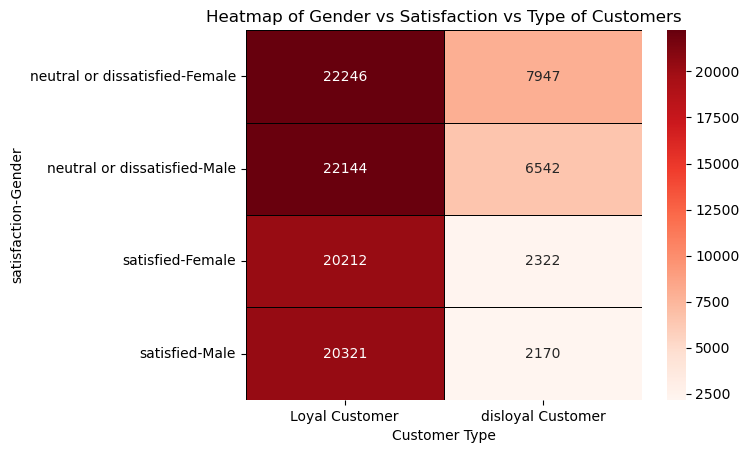

In [135]:
sns.heatmap(data=c_t,annot=True, fmt="d",cmap='Reds',linewidths=0.5,linecolor='black')
plt.title('Heatmap of Gender vs Satisfaction vs Type of Customers')

#### From above heatmap , it is found that the Loyal  ,dissatisfied/neutral Female passengers are more in numbers (22,246) .Then again , Loyal ,dissatisfied Male customers comprises of 22,144 passengers. The satisfied , Loyal Males (20,321) are more in numbers than satisfied ,Loyal Females(20,212). Passengers who are disloyal  and dissatisfied/neutral customers and who are Females(7,947) exceed the Males(6,542) .
#### Similary , The customers who are disloyal but satisfied and are Females (2,322) exceed the Males(2,170)

In [136]:
#gender vs type of travel vs class vs satisfaction vs customer type
c_t = pd.crosstab(index=[dataset['satisfaction'], dataset['Class'],dataset['Type of Travel'],dataset['Gender']], columns=dataset['Customer Type'])
c_t

Customer Type                                            Loyal Customer  \
satisfaction            Class    Type of Travel  Gender                   
neutral or dissatisfied Business Business travel Female            4449   
                                                 Male              4407   
                                 Personal Travel Female             938   
                                                 Male               944   
                        Eco      Business travel Female            2497   
                                                 Male              2500   
                                 Personal Travel Female           11867   
                                                 Male             11797   
                        Eco Plus Business travel Female             832   
                                                 Male               873   
                                 Personal Travel Female            1663   
                                                 Male              1623   
satisfied               Business Business travel Female           15598   
                                                 Male             15709   
                                 Personal Travel Female             130   
                                                 Male               134   
                        Eco      Business travel Female            2241   
                                                 Male              2258   
                                 Personal Travel Female            1358   
                                                 Male              1317   
                        Eco Plus Business travel Female             727   
                                                 Male               747   
                                 Personal Travel Female             158   
                                                 Male               156   

Customer Type                                            disloyal Customer  
satisfaction            Class    Type of Travel  Gender                     
neutral or dissatisfied Business Business travel Female               2316  
                                                 Male                 2120  
                                 Personal Travel Female                  7  
                                                 Male                    4  
                        Eco      Business travel Female               5042  
                                                 Male                 4218  
                                 Personal Travel Female                 65  
                                                 Male                   58  
                        Eco Plus Business travel Female                517  
                                                 Male                  138  
                                 Personal Travel Female                  0  
                                                 Male                    4  
satisfied               Business Business travel Female               1489  
                                                 Male                 1420  
                                 Personal Travel Female                  0  
                                                 Male                    0  
                        Eco      Business travel Female                775  
                                                 Male                  726  
                                 Personal Travel Female                 13  
                                                 Male                   13  
                        Eco Plus Business travel Female                 45  
                                                 Male                   11  
                                 Personal Travel Female                  0  
                                                 Male                    0

Text(0.5, 1.0, 'Heatmap of Gender vs Satisfaction vs Type of Customers vs class vs Type of Travel')

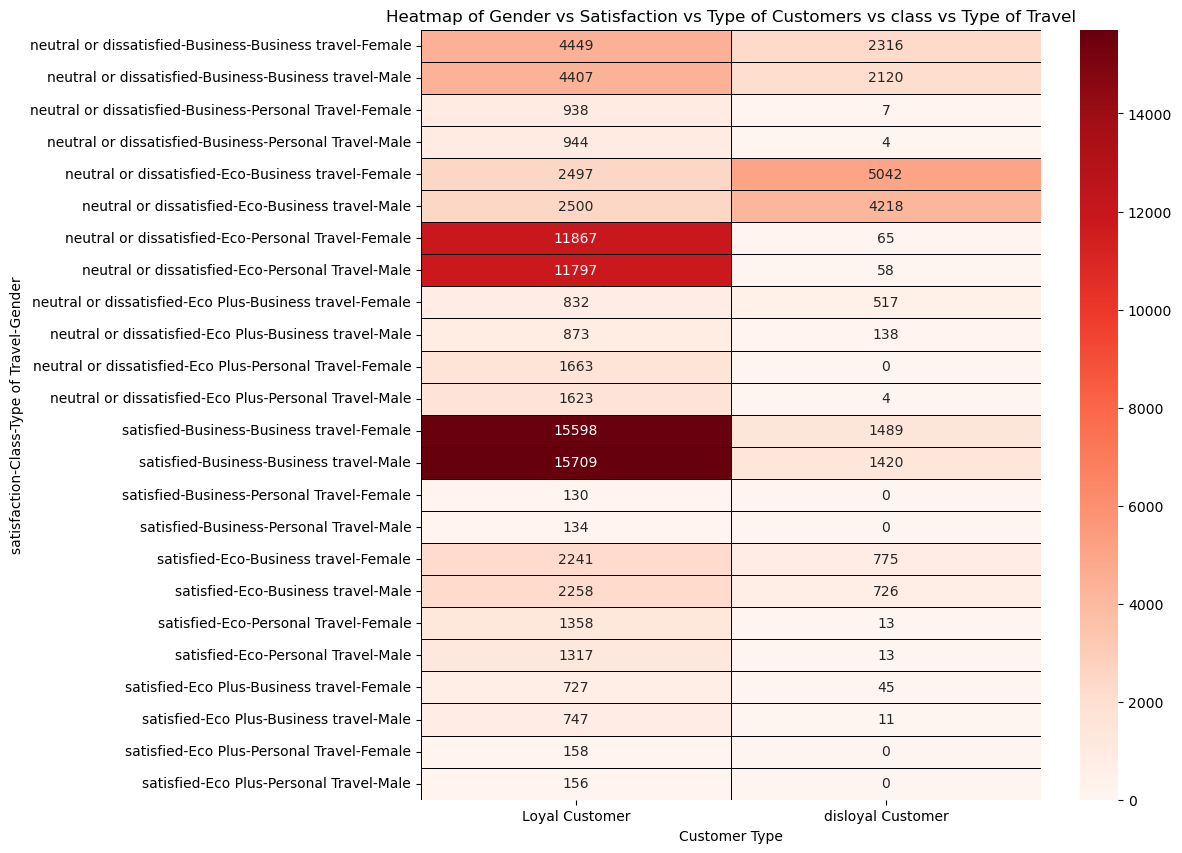

In [137]:
plt.figure(figsize=(10,10))
sns.heatmap(data=c_t,annot=True, fmt="d",cmap='Reds',linewidths=0.5,linecolor='black')
plt.title('Heatmap of Gender vs Satisfaction vs Type of Customers vs class vs Type of Travel')

## Final Conclusion

### The attributes that distinguish overall passenger satisfaction( satisfied/dissatisfied-neutral) are:
####
NUMERICAL ATTRIBUTES/FEATURES 
#### 1.Age 
#### 2.Flight Distance
#### 
CATEGORICAL ATTRIBUTES/FEATURES
#### 1.Customer Type
#### 2.Type of Travel
#### 3.Class
#### 4.Inflight wifi service
#### 5.Departure/Arrival Tie convenient
#### 6.Ease of online booking
#### 7.Gate Location
#### 8.Food and Drink
#### 9.Online boarding
#### 10.Seat comfort
#### 11.Inflight entertainment
#### 12.On-board service
#### 13.Leg room service
#### 14.Baggage handling
#### 15.Checkin  service
#### 16.Inflight service 
#### 17.Cleanliness

Level/Outcome Variable
#### 1.Satisfaction
####
Features Removed
#### 1.Gender
#### 2.Departure Delay in Minutes
#### 3.Arrival Delay in Minutes